In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import regex as re

## Combing and Cleaning Files

ref_states missing chandigarh, chhattisgarh, dadra and nagar haveli, goa, punjab, sikkim, telangana, uttar pradesh, uttarakhand, and west bengal

Combine andaman and nicobar & andaman and nicobar islands

Combine nct of delhi & delhi

In [119]:
# Combining Andaman and Nicobar Islands and Andaman and Nicobar citizen csv files
aani_df = pd.read_csv("citizen_data/Andaman and Nicobar Islands_citizenData.csv")
aan_df = pd.read_csv("citizen_data/Andaman and Nicobar_citizenData.csv")
pd.concat([aan_df, aani_df],ignore_index=True).to_csv('citizen_data/Andaman and Nicobar Islands_citizenData.csv',index=False)

In [121]:
# Combining Delhi and NCT of Delhi citizen csv files
nct_delhi_df = pd.read_csv("citizen_data/NCT of Delhi_citizenData.csv")
delhi_df = pd.read_csv("citizen_data/Delhi_citizenData.csv")
pd.concat([delhi_df, nct_delhi_df],ignore_index=True).to_csv('citizen_data/Delhi_citizenData.csv')

## Finding Shared CSVs & Creating Filenames CSV

In [63]:
# cit_states contains each state that appears in the citizen database
cit_states = []
"""for state in np.sort(cit_df['State_name'].unique()):
    state = state.lower()
    cit_states.append(state)"""
# ref_states contains each state that appears in the reference database
for tablename in os.listdir('./citizen_data/'):
    if tablename == '.DS_Store':
        continue
    tablename = tablename.replace('_citizenData.csv','')
    tablename = tablename.lower()
    cit_states.append(tablename)
ref_states = []
for tablename in os.listdir('./reference_data/'):
    if tablename == '.DS_Store':
        continue
    tablename = tablename.replace('pvt_','')
    tablename = tablename.replace('.csv','')
    tablename = tablename.replace('_',' ')
    tablename = tablename.lower()
    ref_states.append(tablename)
ref_states.sort()

In [47]:
(set(cit_states) & set(ref_states)) == set(ref_states) 
# Every state in the reference database is in citizen database
# Join databases on ref_states.

True

In [65]:
# Finding citizen files for states shared with reference db.
cit_filenames = []
ref_filenames = os.listdir('./reference_data/')
if '.DS_Store' in ref_filenames:
    ref_filenames.remove('.DS_Store')
for ref_filename in ref_filenames:
    cit_filename = ref_filename.replace('pvt_','')
    cit_filename = cit_filename.replace('_', ' ')
    cit_filename = cit_filename.replace('.csv', '_citizenData.csv')
    cit_filenames.append(cit_filename)
ref_filenames.sort()
cit_filenames.sort()

In [70]:
pd.DataFrame(data=zip(ref_states,ref_filenames,cit_filenames), 
             columns=['state','reference_filename', 'citizen_filename']
            ).to_csv('db_filenames.csv', index=False)

# Plotting

In [58]:
ref_df = pd.read_csv("reference_data/pvt_andaman_and_nicobar_islands.csv")
cit_df = pd.read_csv("citizen_data/Andaman and Nicobar Islands_citizenData.csv")

In [ ]:
for state in cit_df['State_name'].unique():
    state_cit_df = cit_df[cit_df['State_name'] == state]
    state_ref_df = 
    plt.plot(state_cit_df['week'], )

In [2]:
all_df = pd.read_csv("updated_alldata.csv")

In [3]:
kerala_df = pd.read_csv("citizen_data/kerala_citizenData.csv")

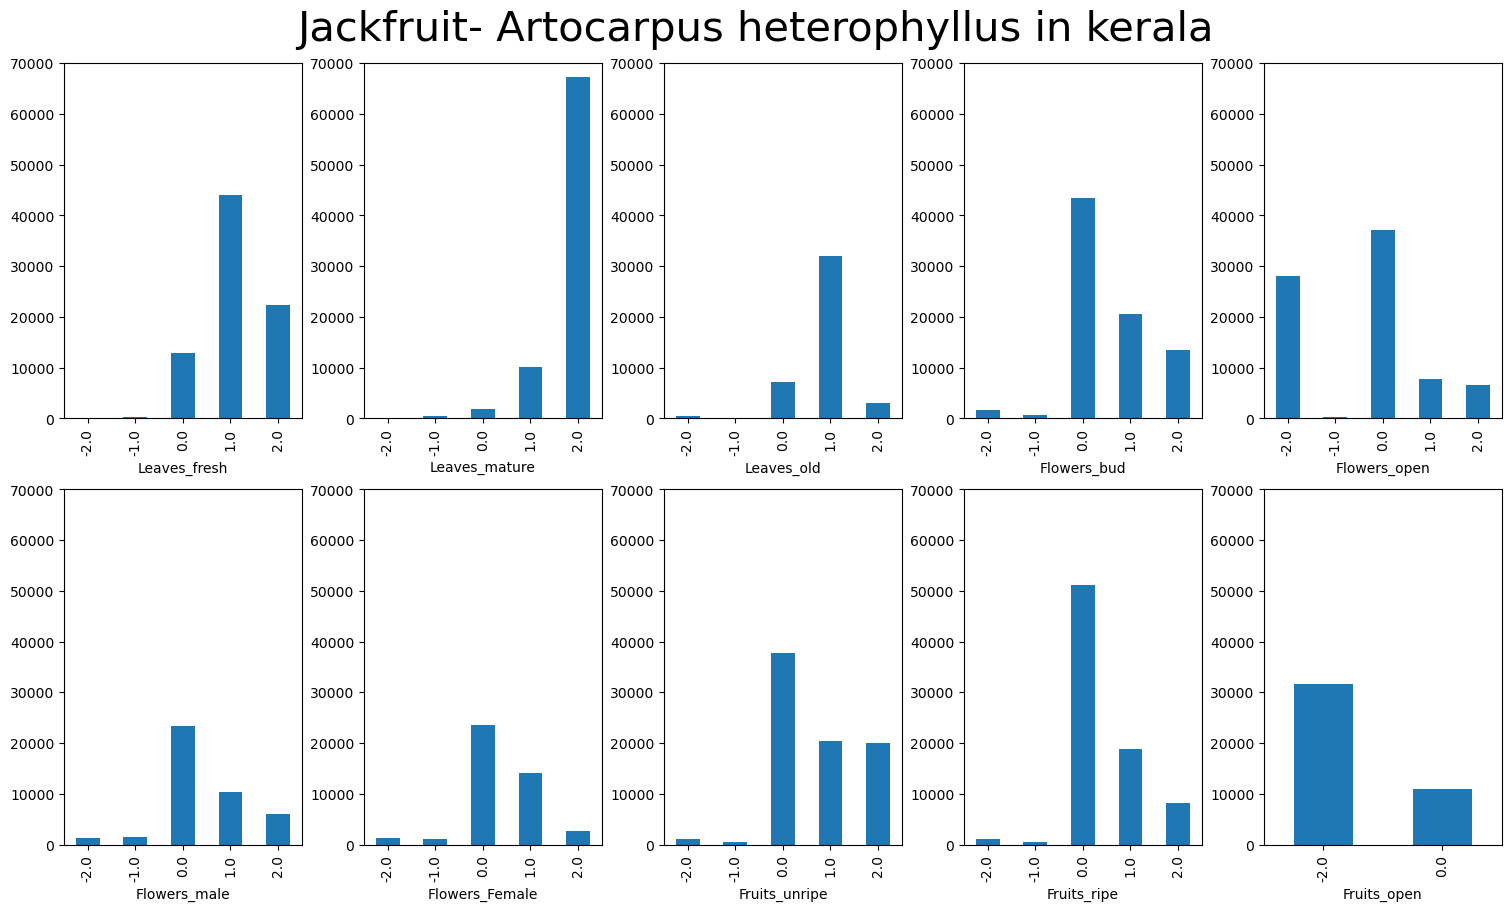

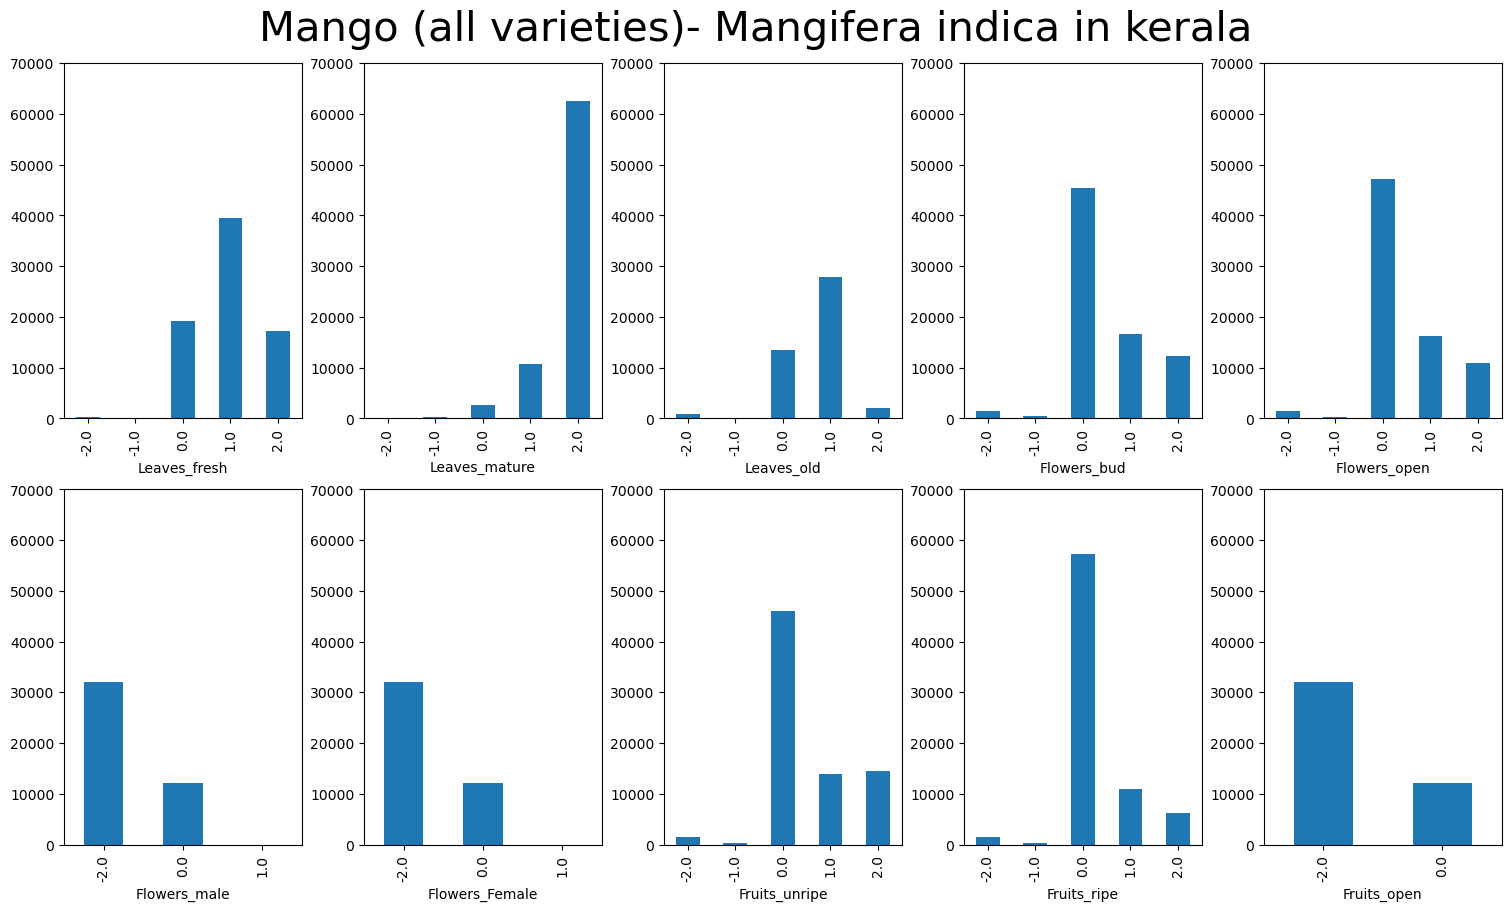

In [78]:
# TODO: Adjust Sizes and Spacing
for species in kerala_df['Species_name'].value_counts().index[:2]:
    fig, ax = plt.subplots(2, 5, constrained_layout=True, figsize=(15, 9))
    for idx, col in enumerate(kerala_df.columns[2:-2]):
        plt.subplot(2, 5, idx+1)
        plt.ylim(0,70000)
        kerala_df[kerala_df['Species_name'] == species][col].value_counts().sort_index().plot.bar()

    fig.suptitle(f"{species} in kerala", fontsize=30)
    plt.show()

# Plotting Each Feature for Trees in Kerala over Time

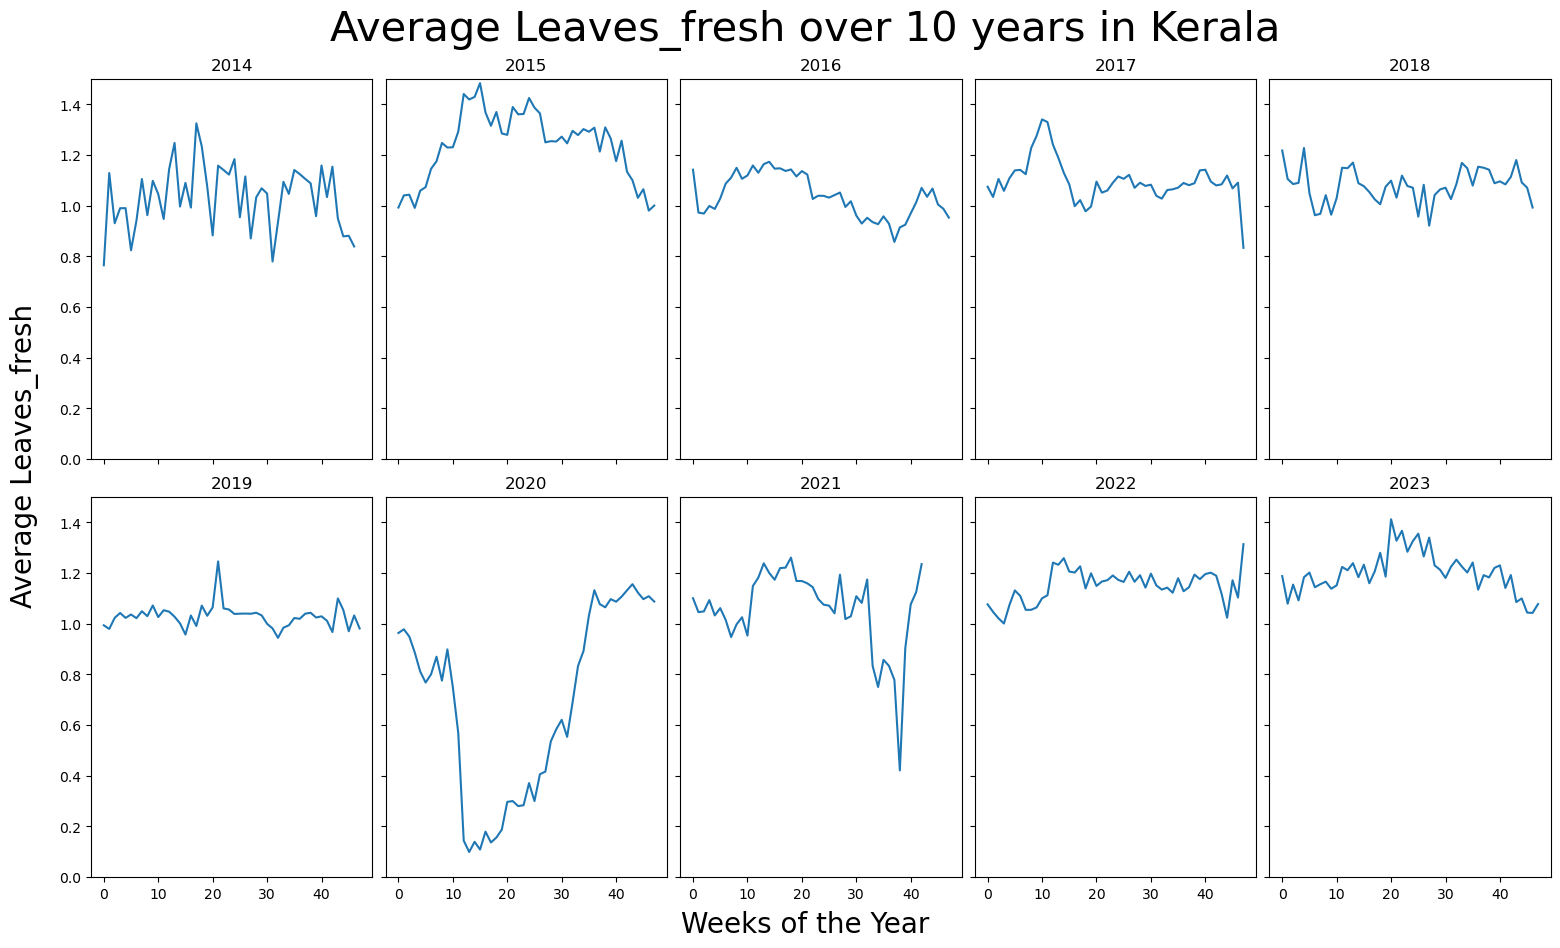

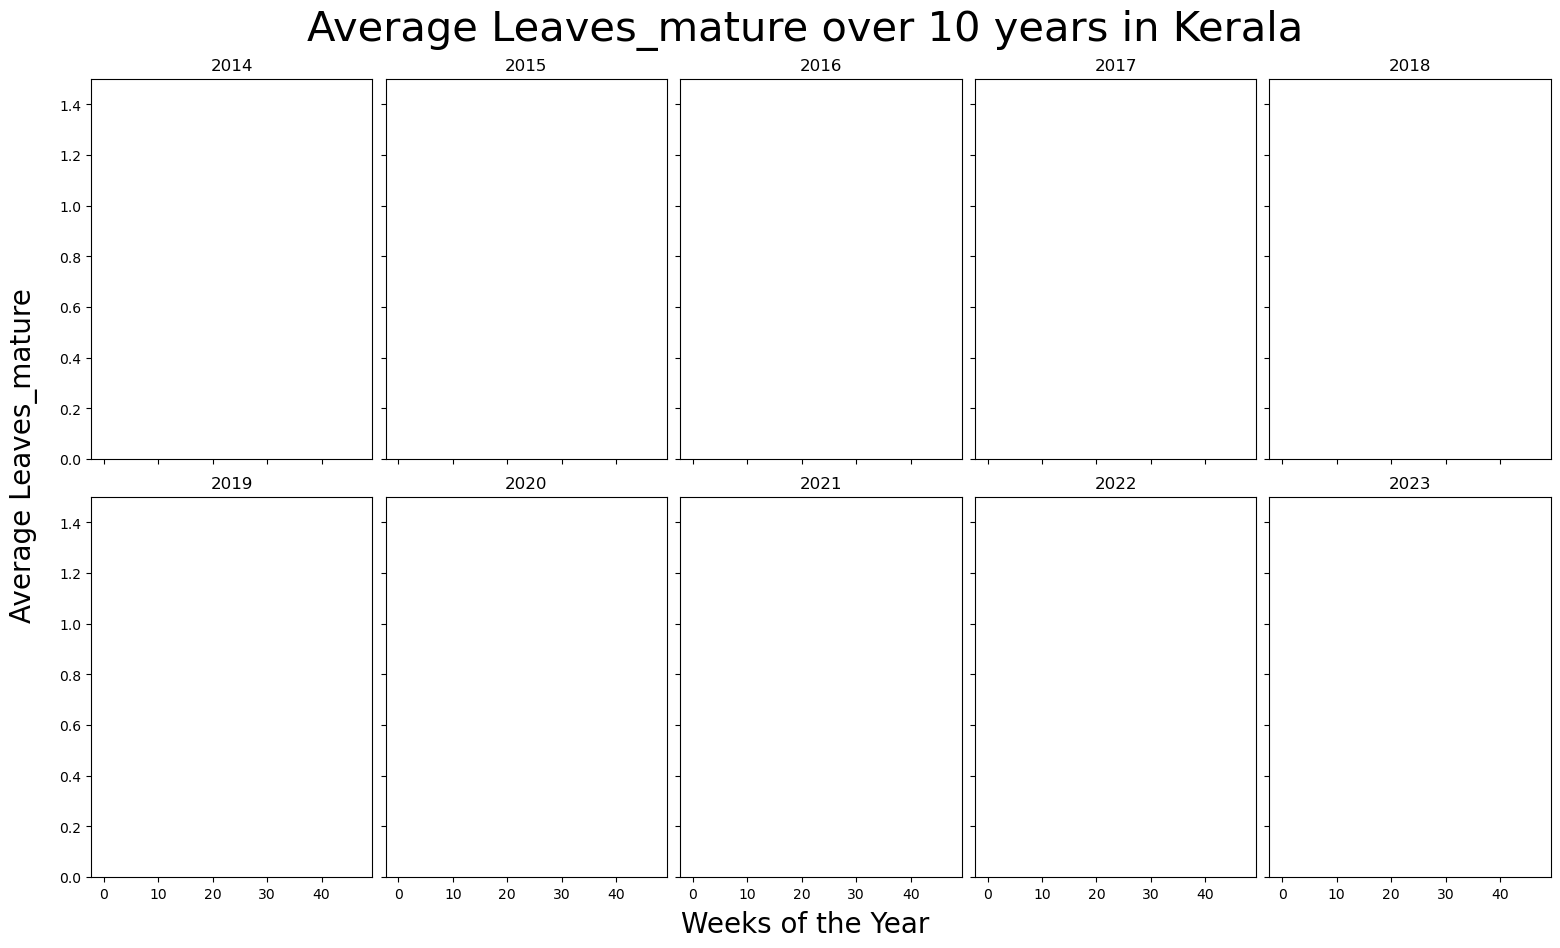

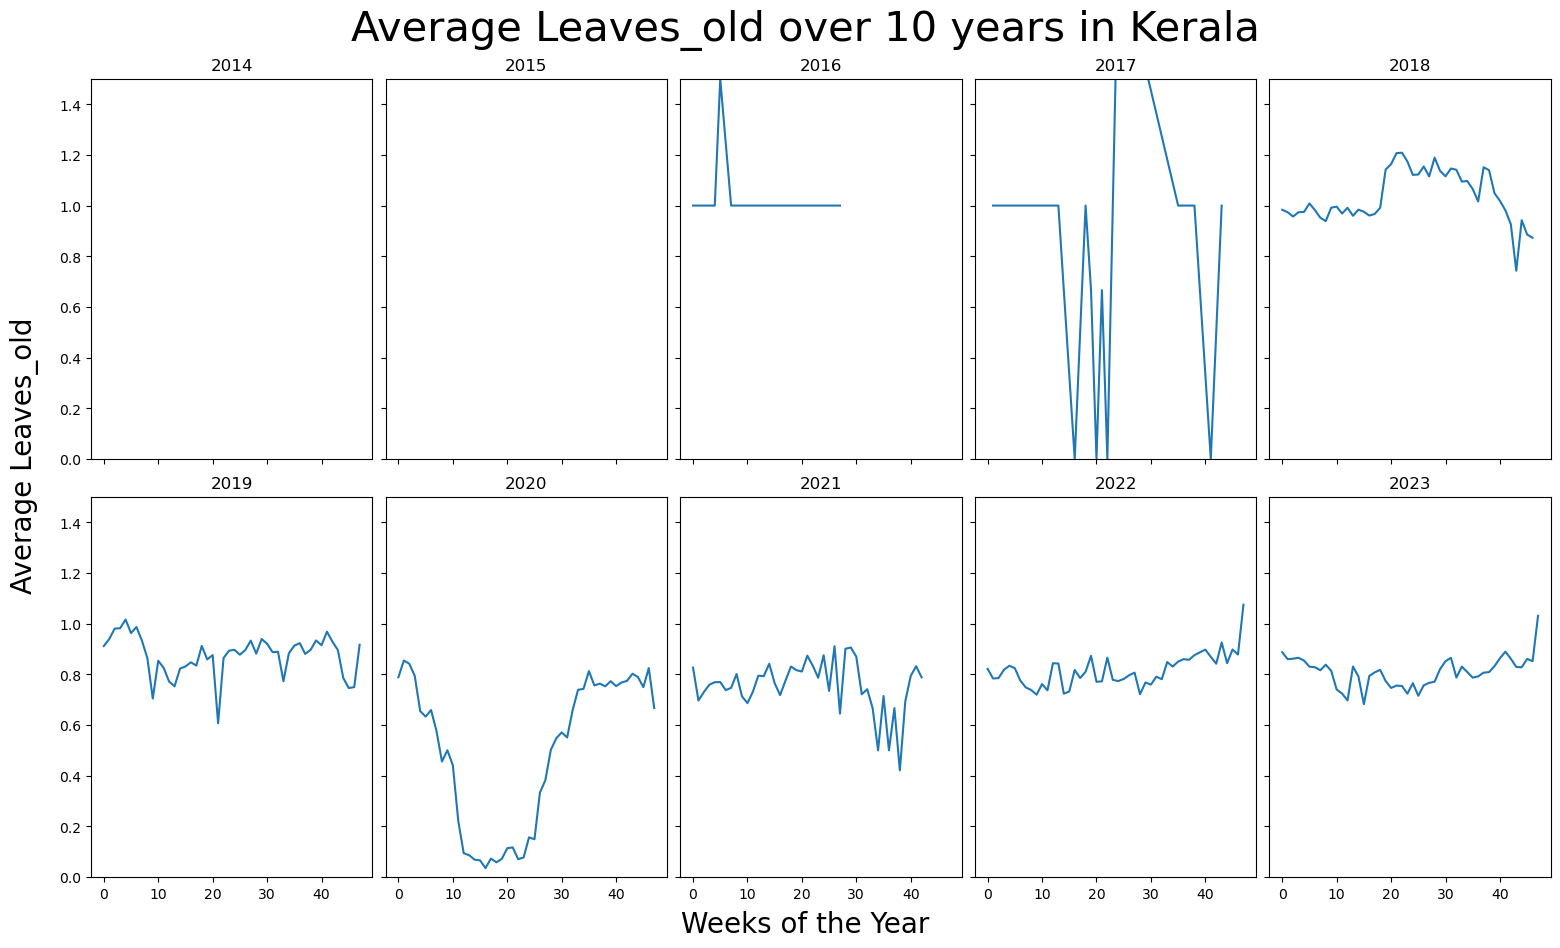

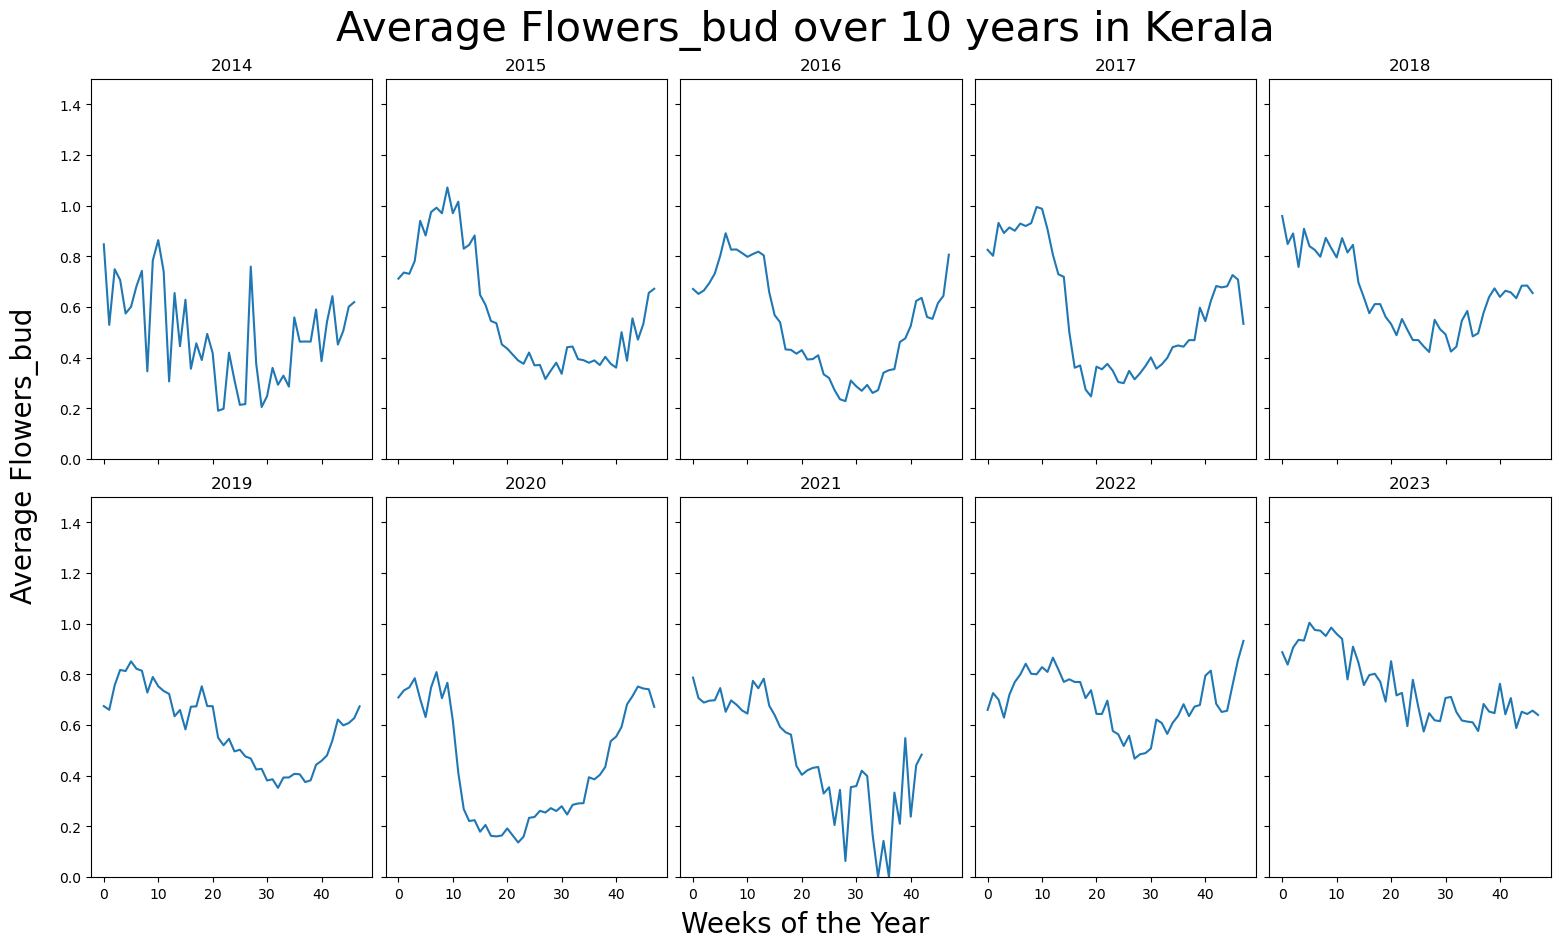

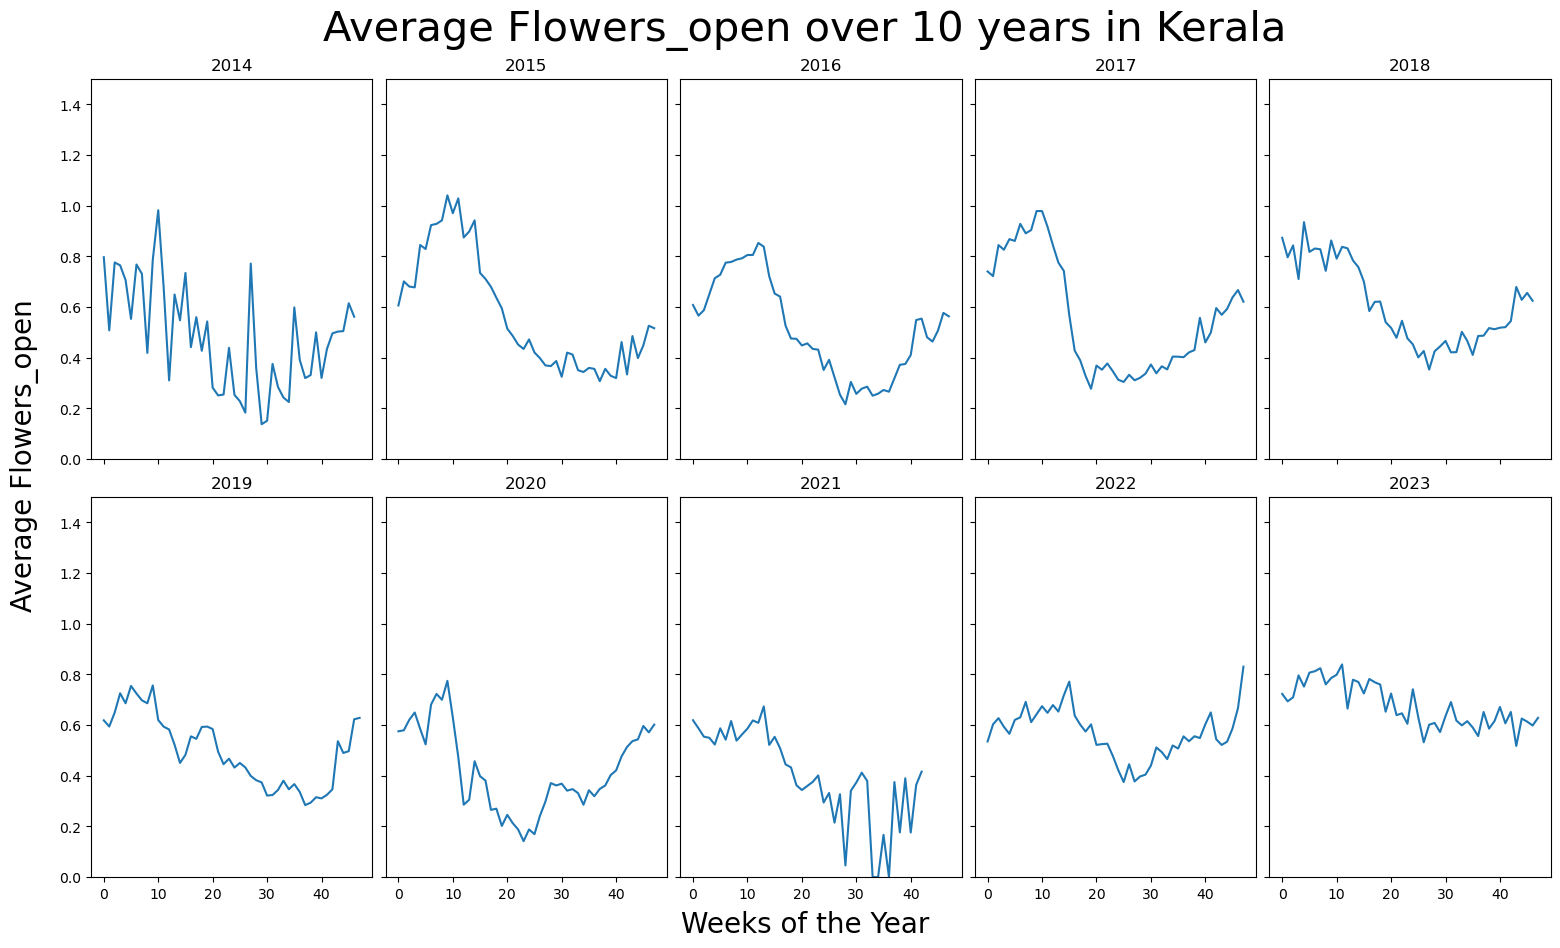

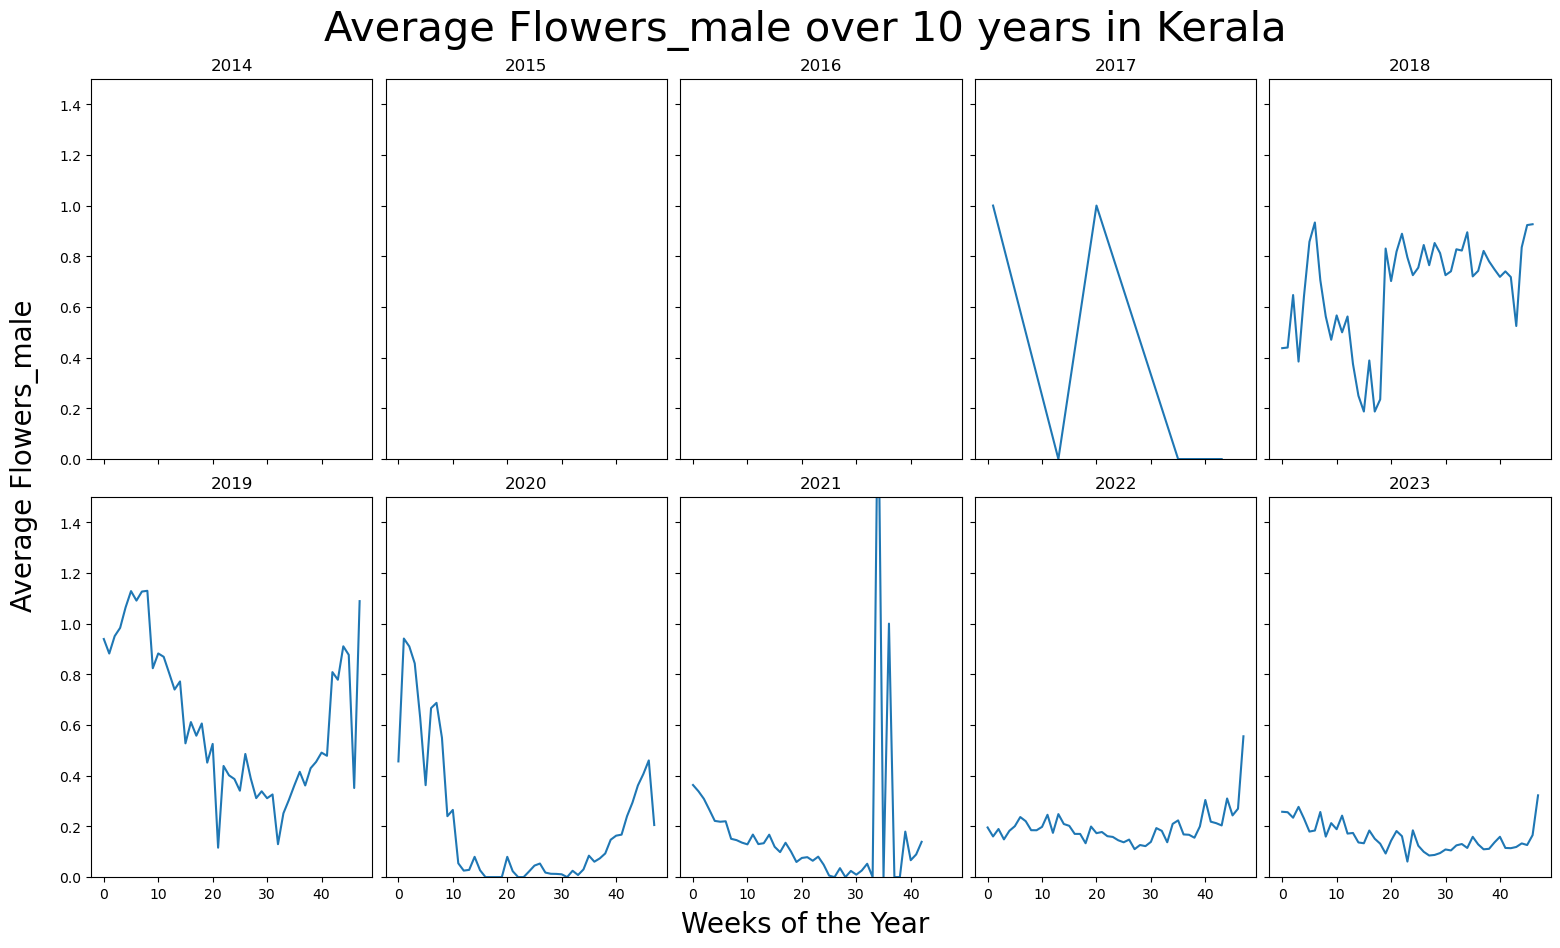

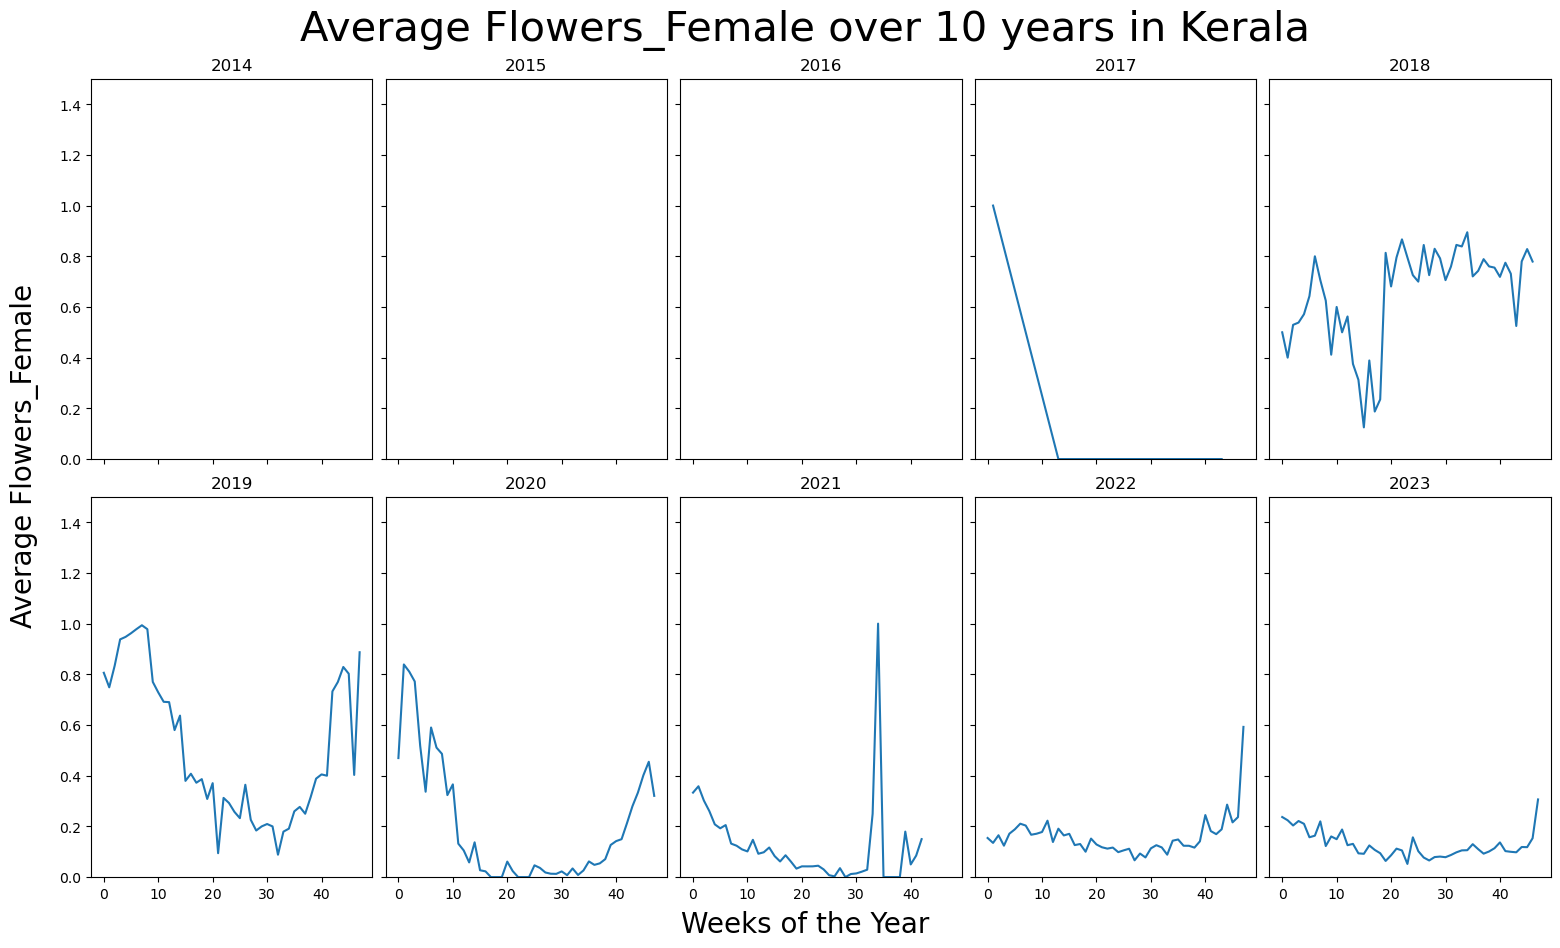

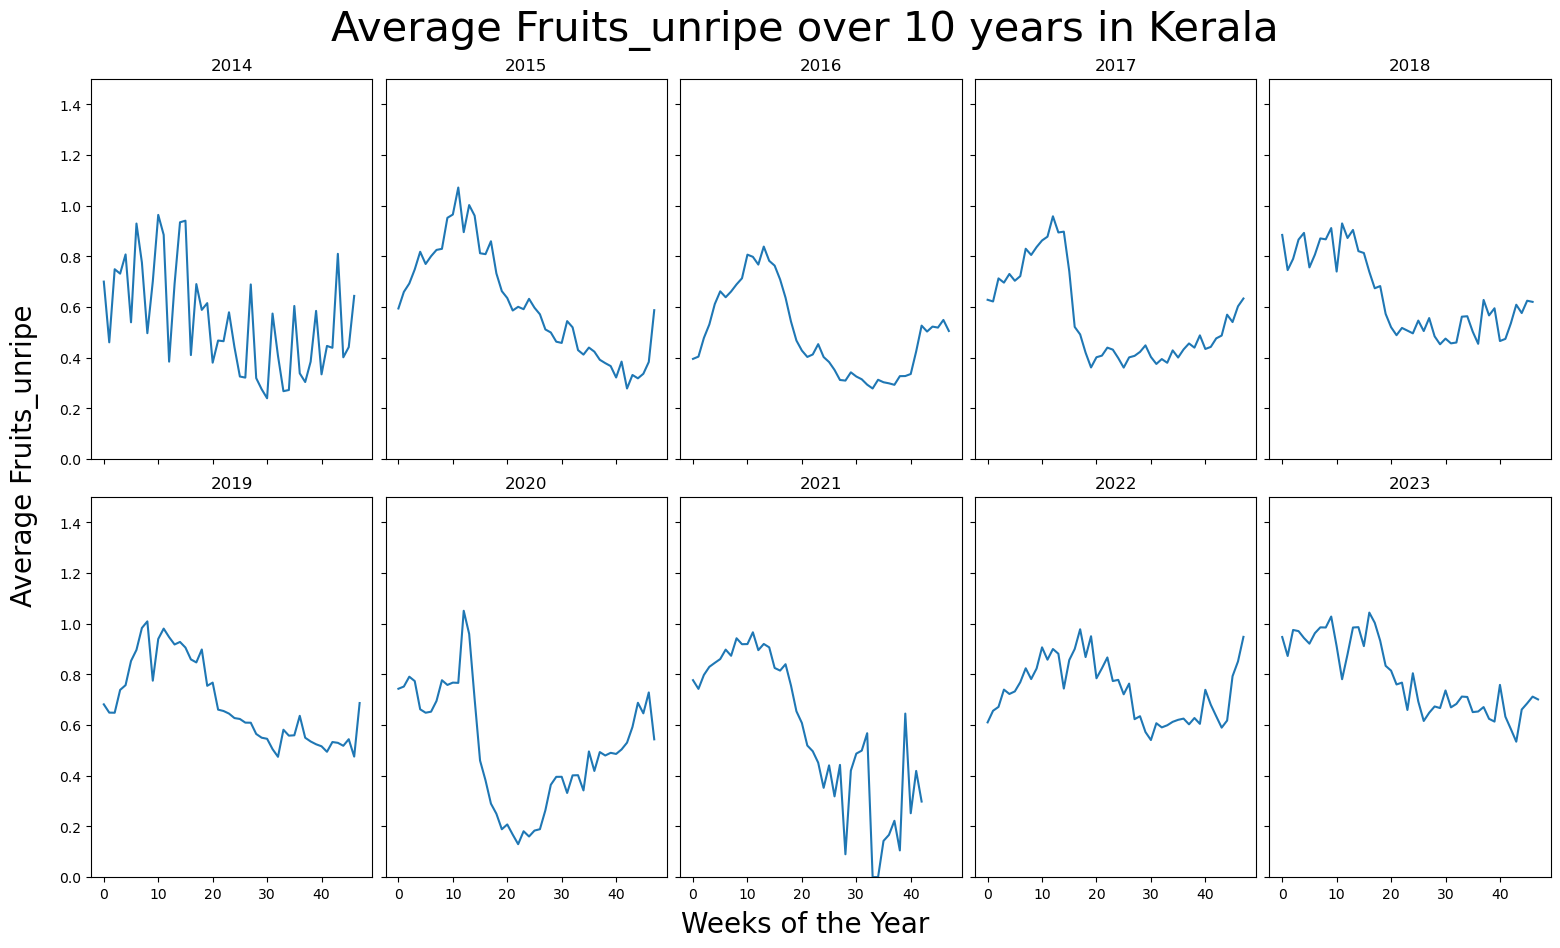

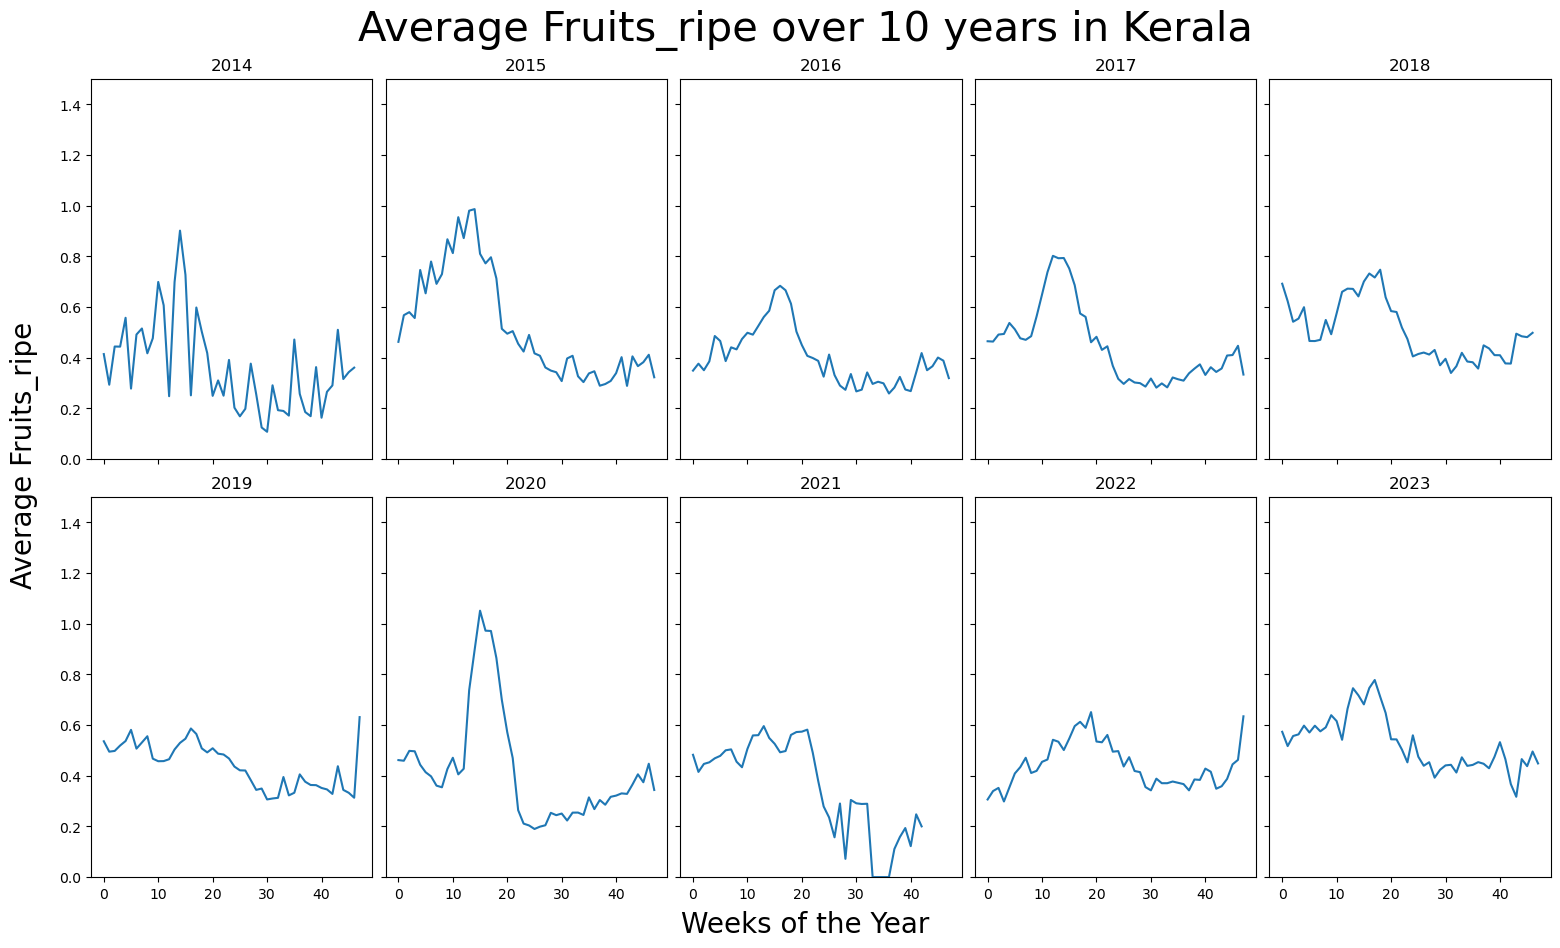

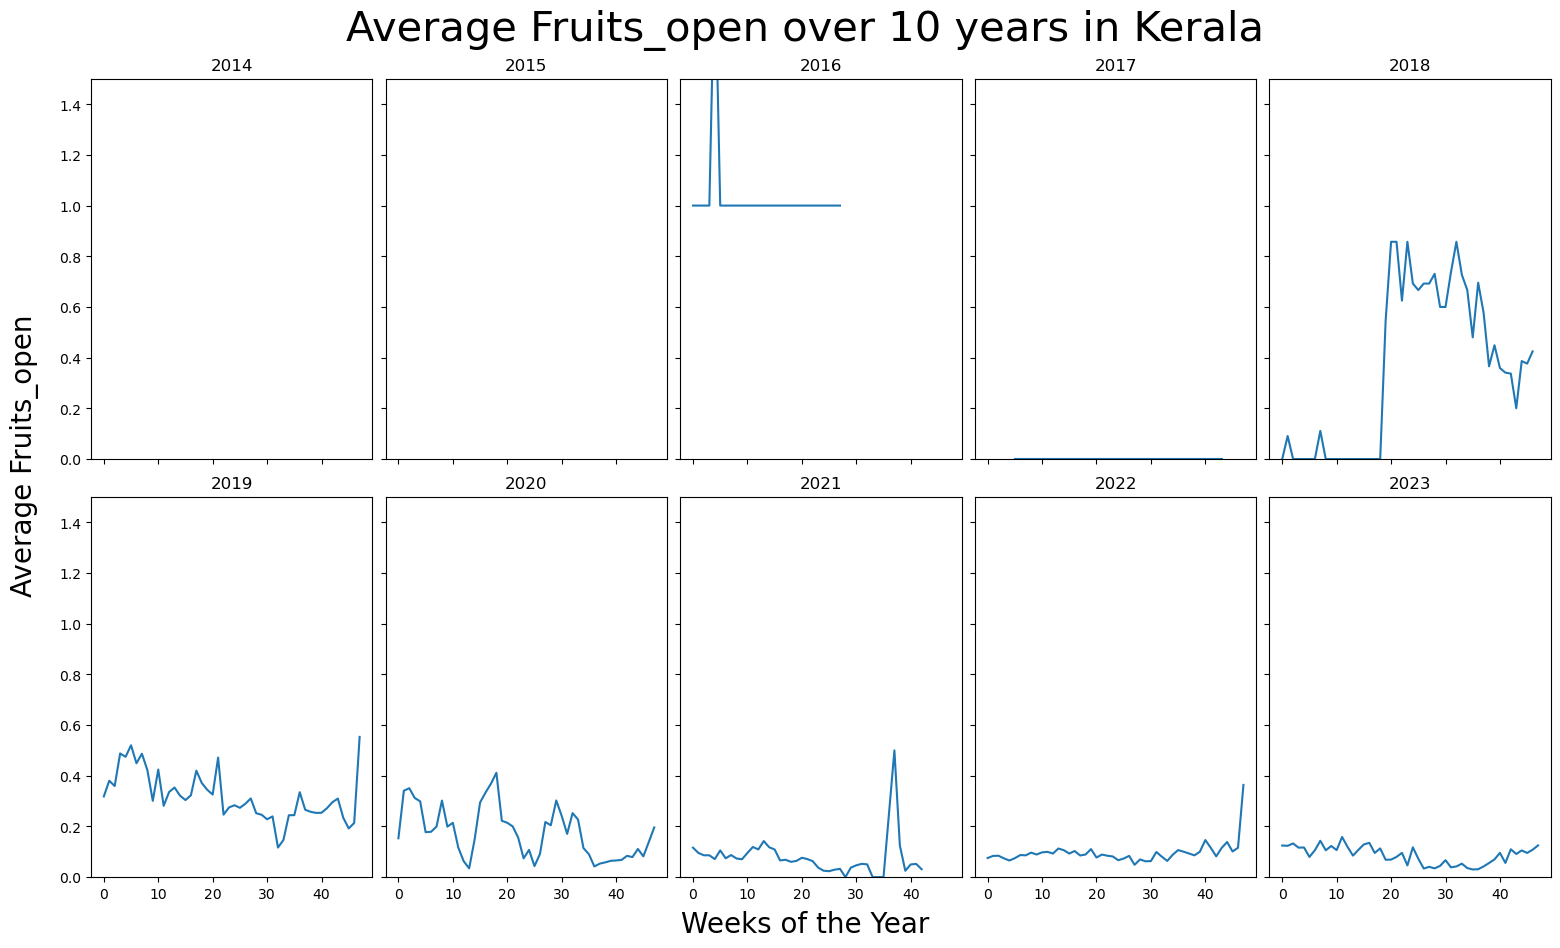

In [211]:
for feature in kerala_df.columns[2:-2]:
    fig, ax = plt.subplots(2, 5, sharex=True, sharey=True, constrained_layout=True, figsize=(15, 9))
    for idx, year in enumerate(kerala_df['Year'].sort_values().unique()):
        plt.subplot(2, 5, idx+1)
        plt.ylim(0,1.5)
        year_df = kerala_df[kerala_df['Year'] == year]
        year_df = year_df[year_df[feature].isin([0,1,2])] # Getting rid of NA values
        year_df = year_df.sort_values('Week')
        plt.plot(np.sort(year_df['Week'].unique()), year_df.groupby(['Week'])[feature].mean())
        plt.title(year)
    fig.suptitle(f"Average {feature} over 10 years in Kerala", fontsize=30)
    #plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
    fig.text(0.5, -0.03, 'Weeks of the Year', ha='center', fontsize=20)
    fig.text(-0.03, 0.5, f'Average {feature}', va='center', rotation='vertical', fontsize=20)
    plt.show()

# Plotting Each Feature for Jackfruit over Time

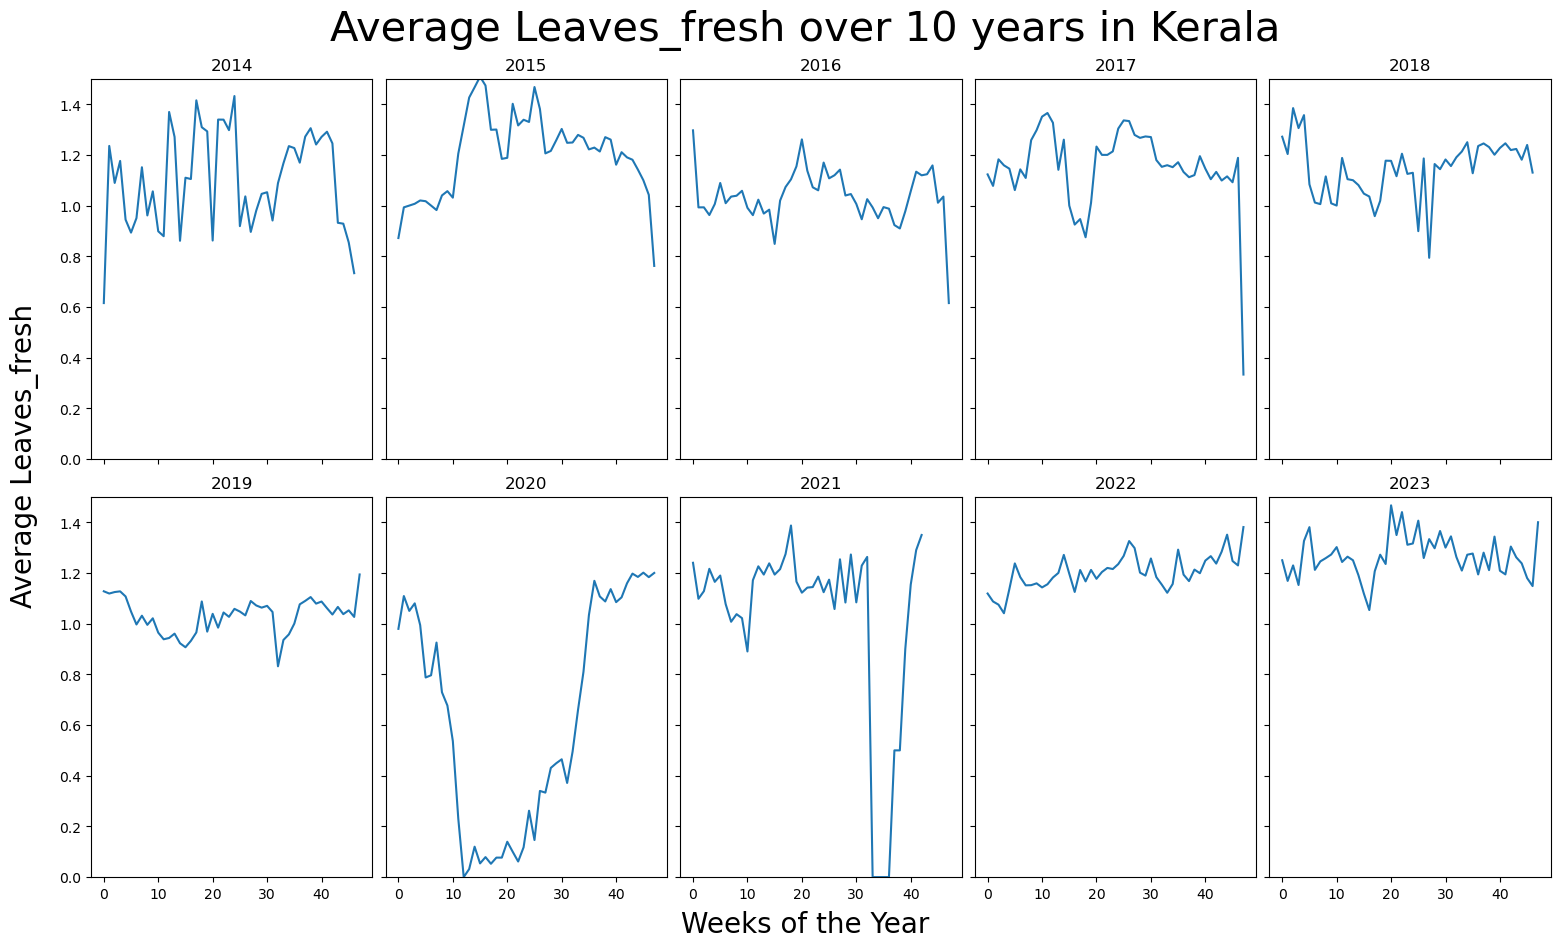

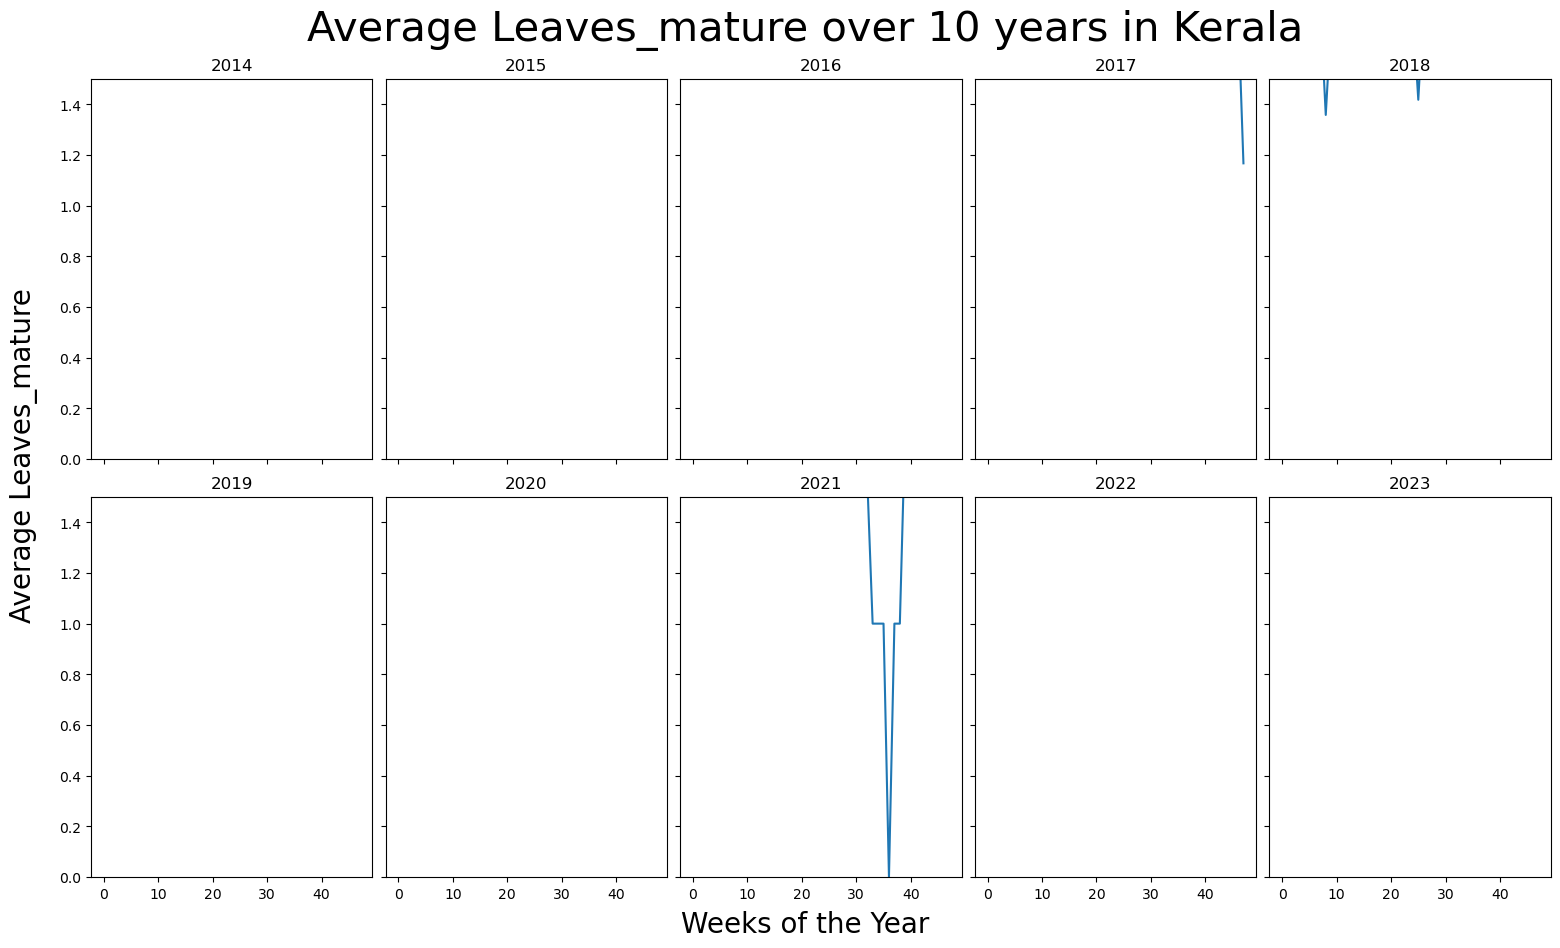

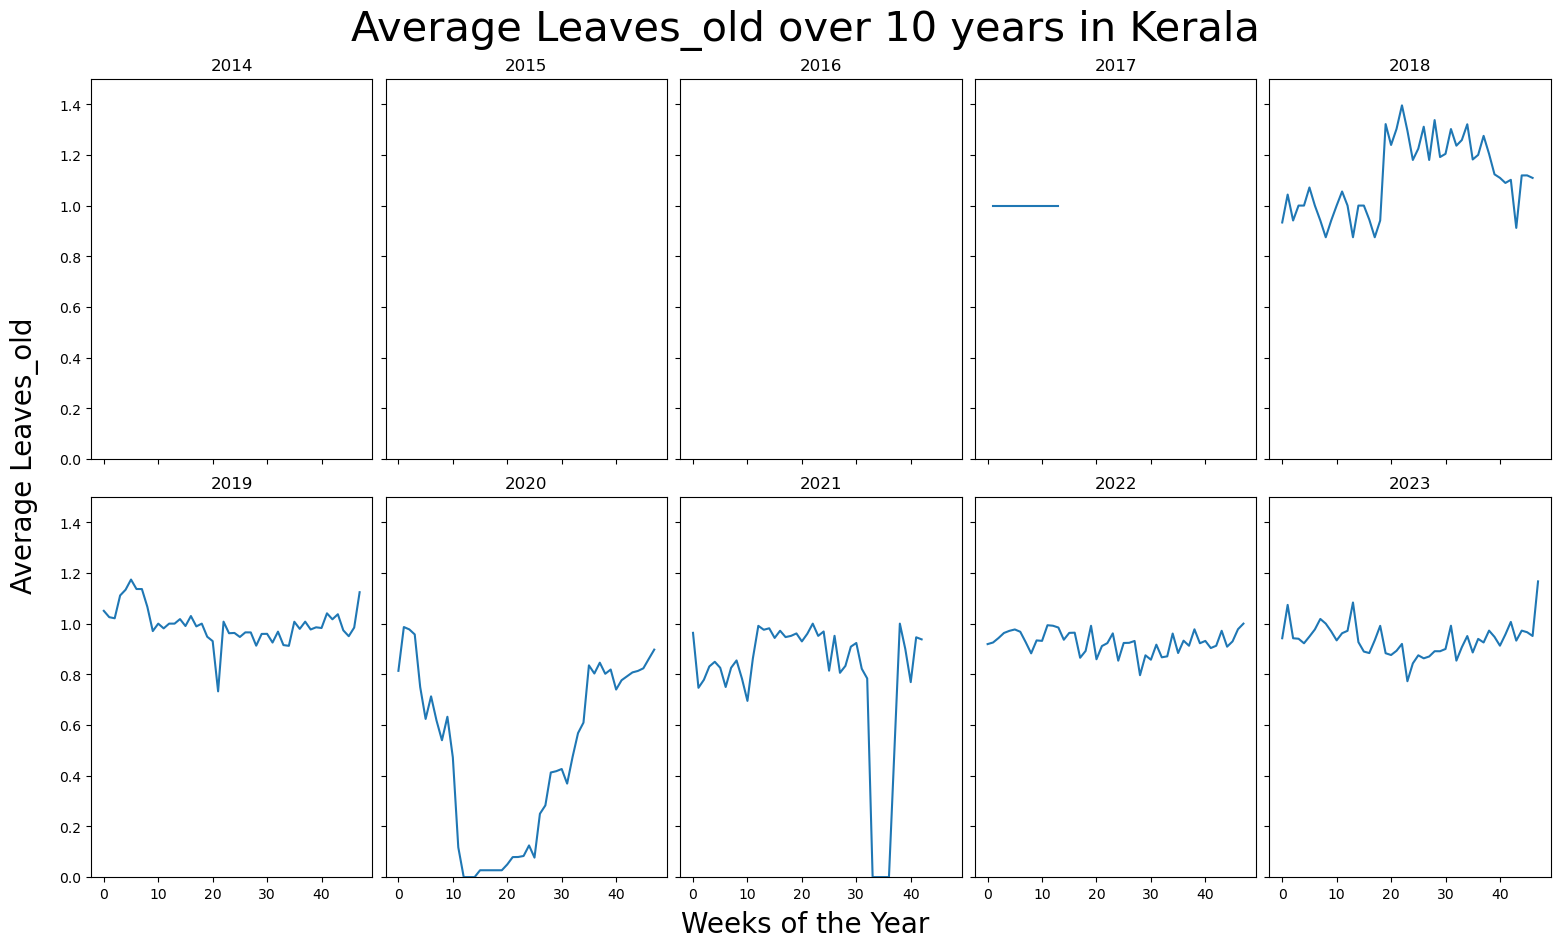

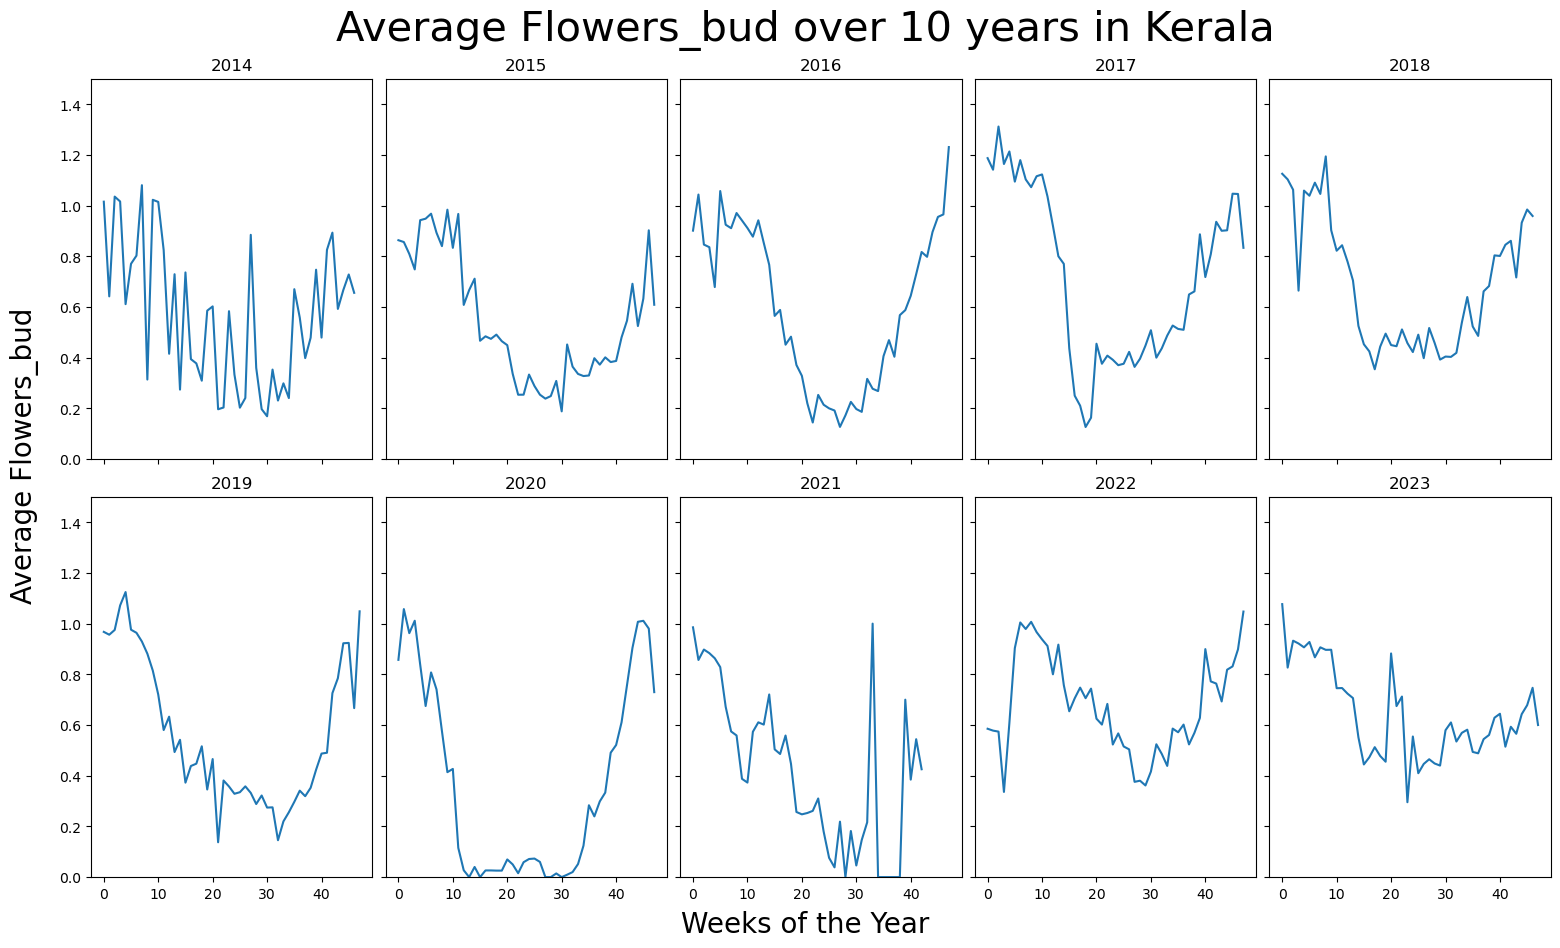

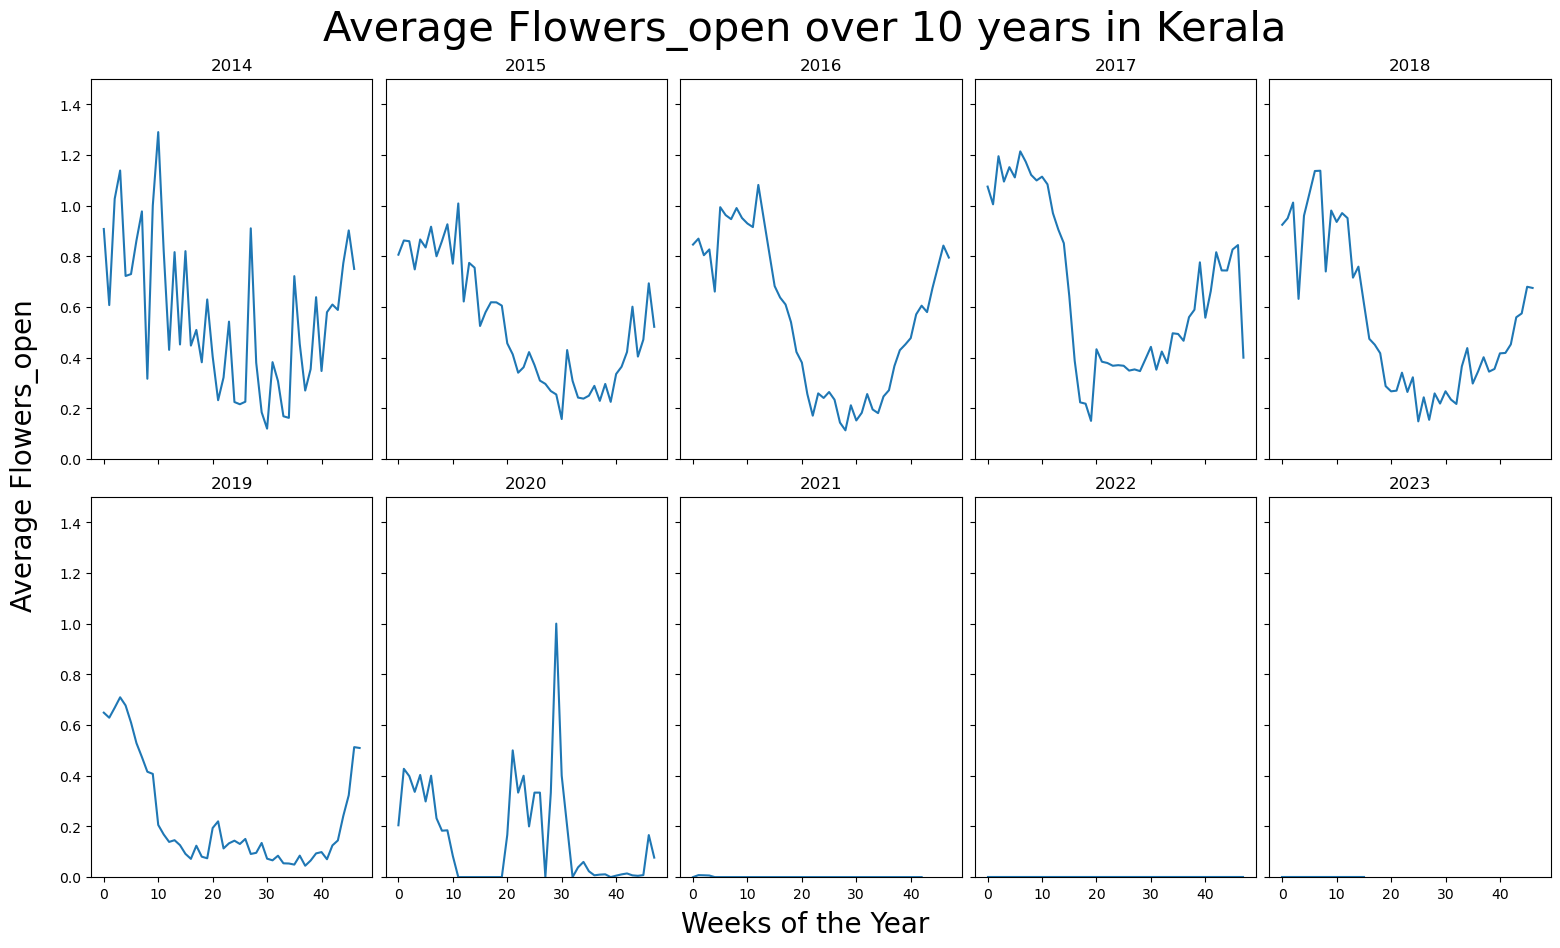

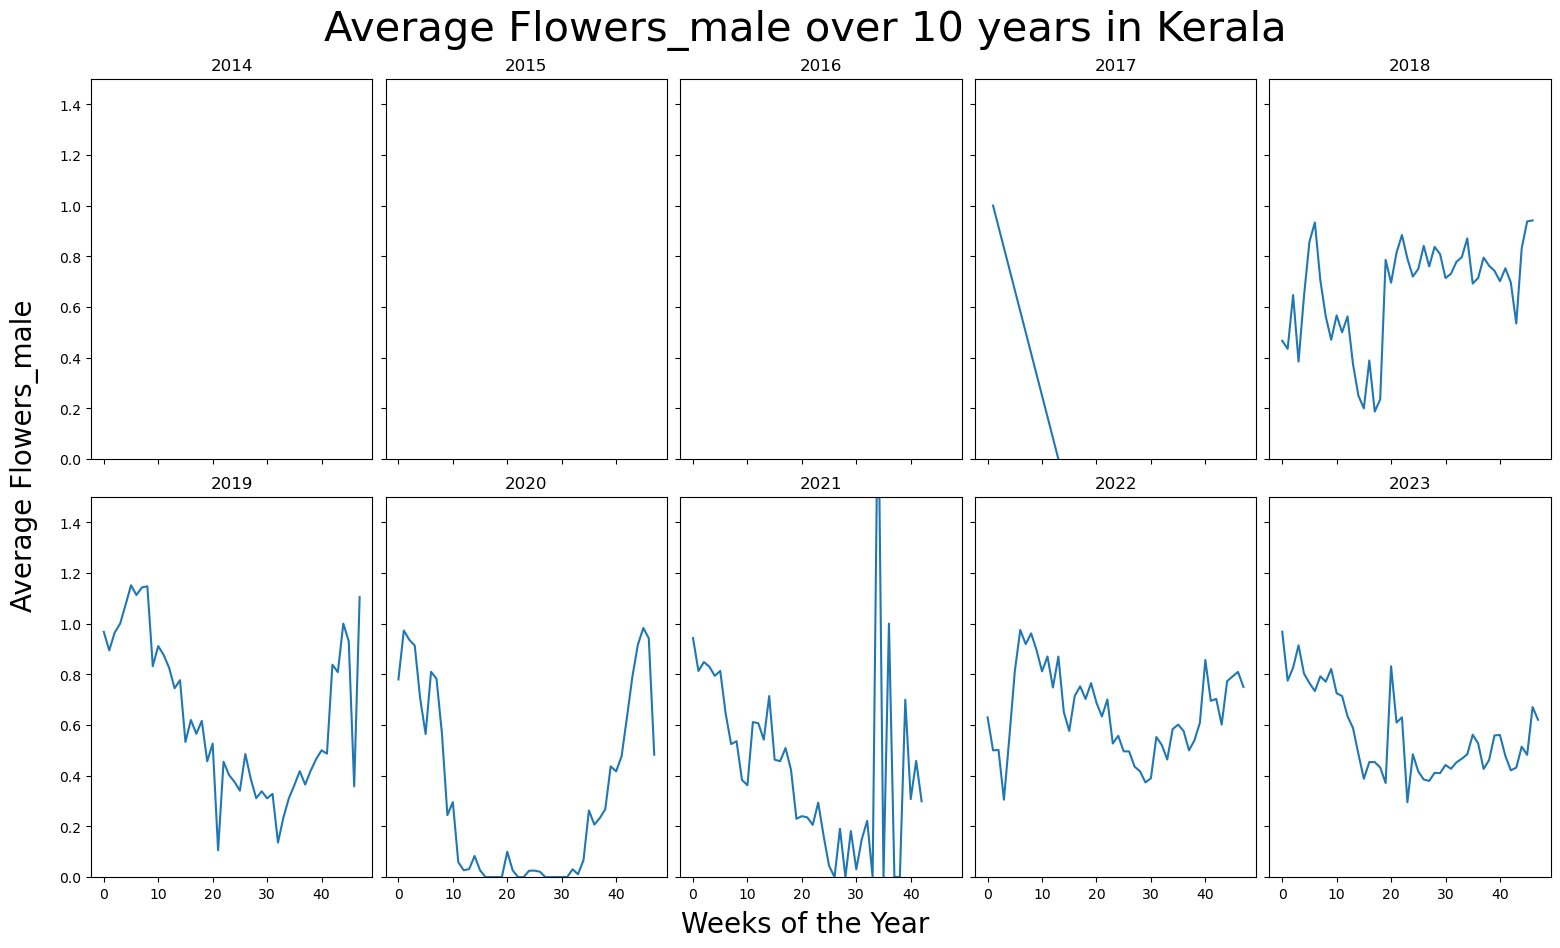

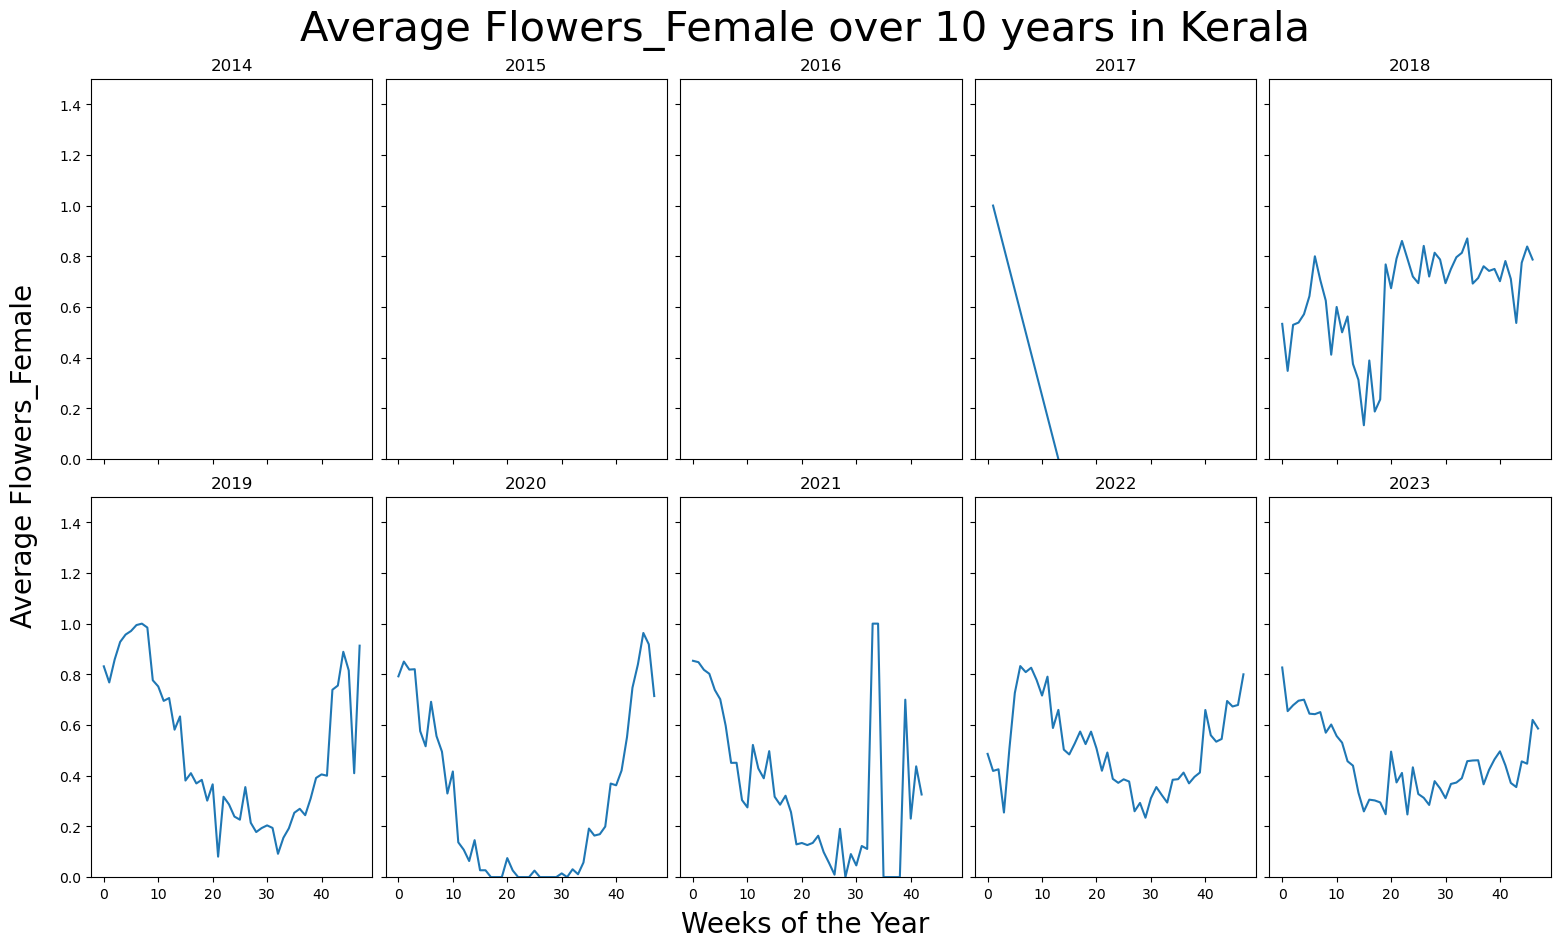

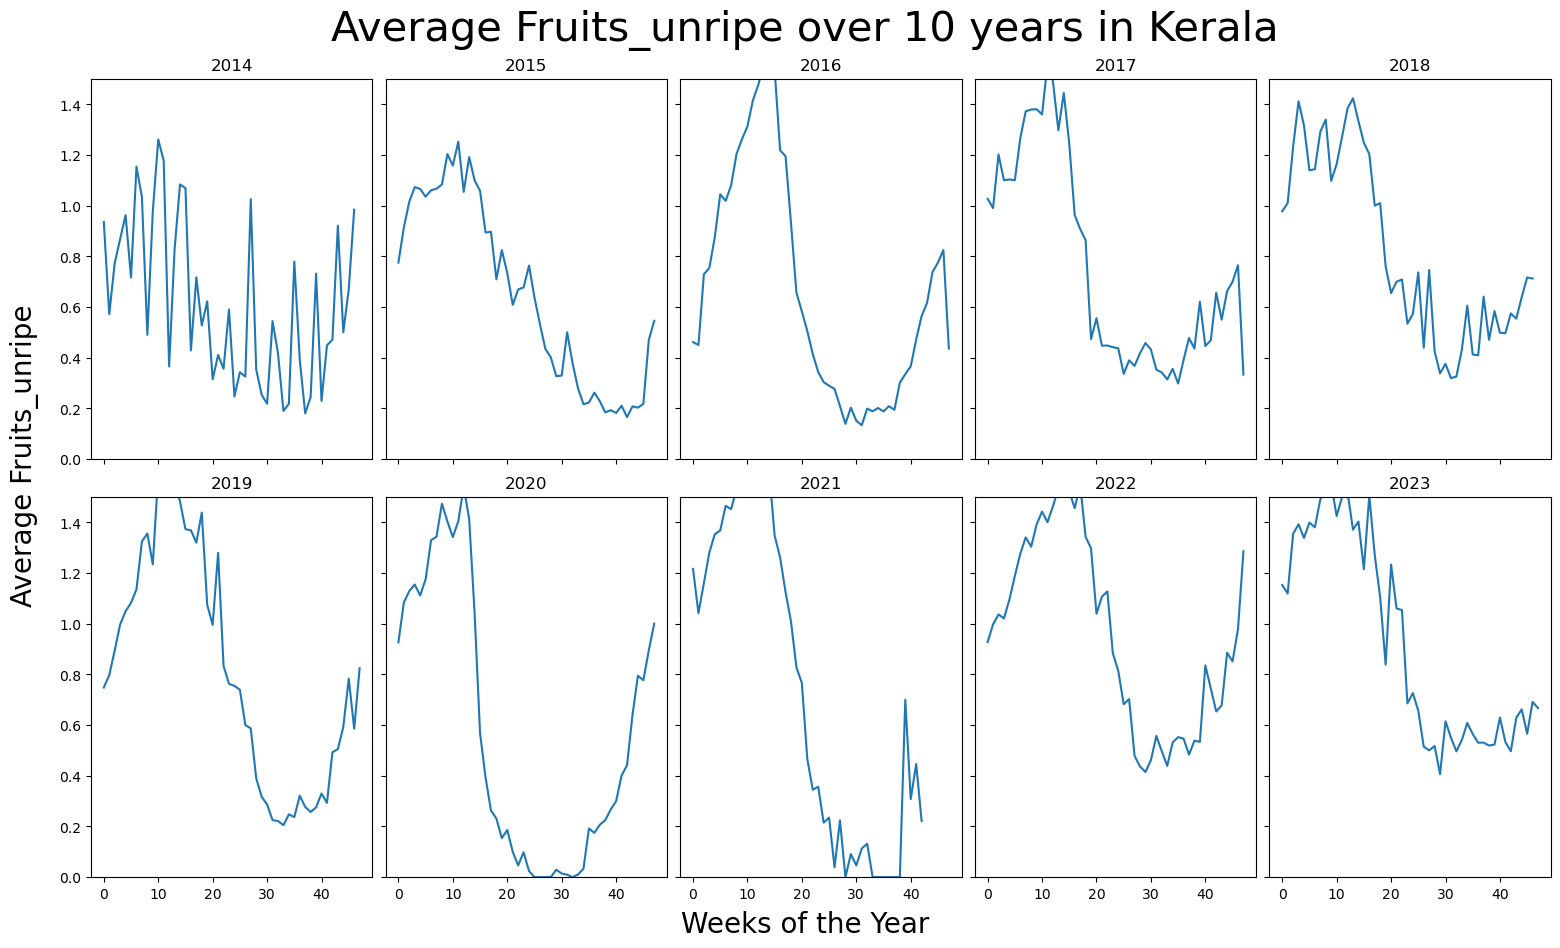

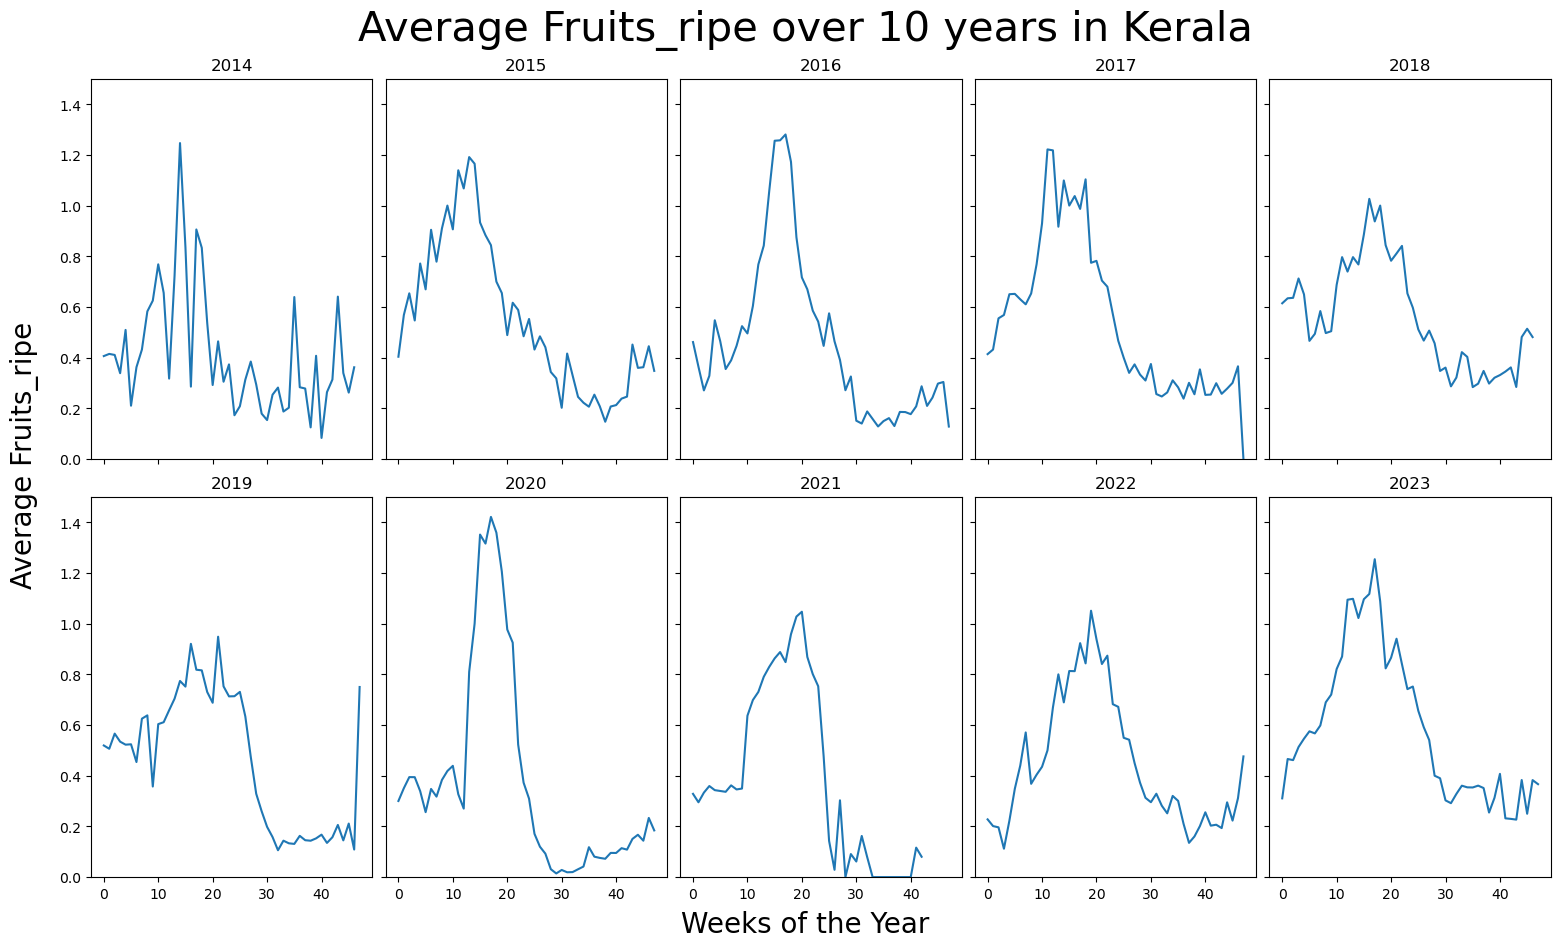

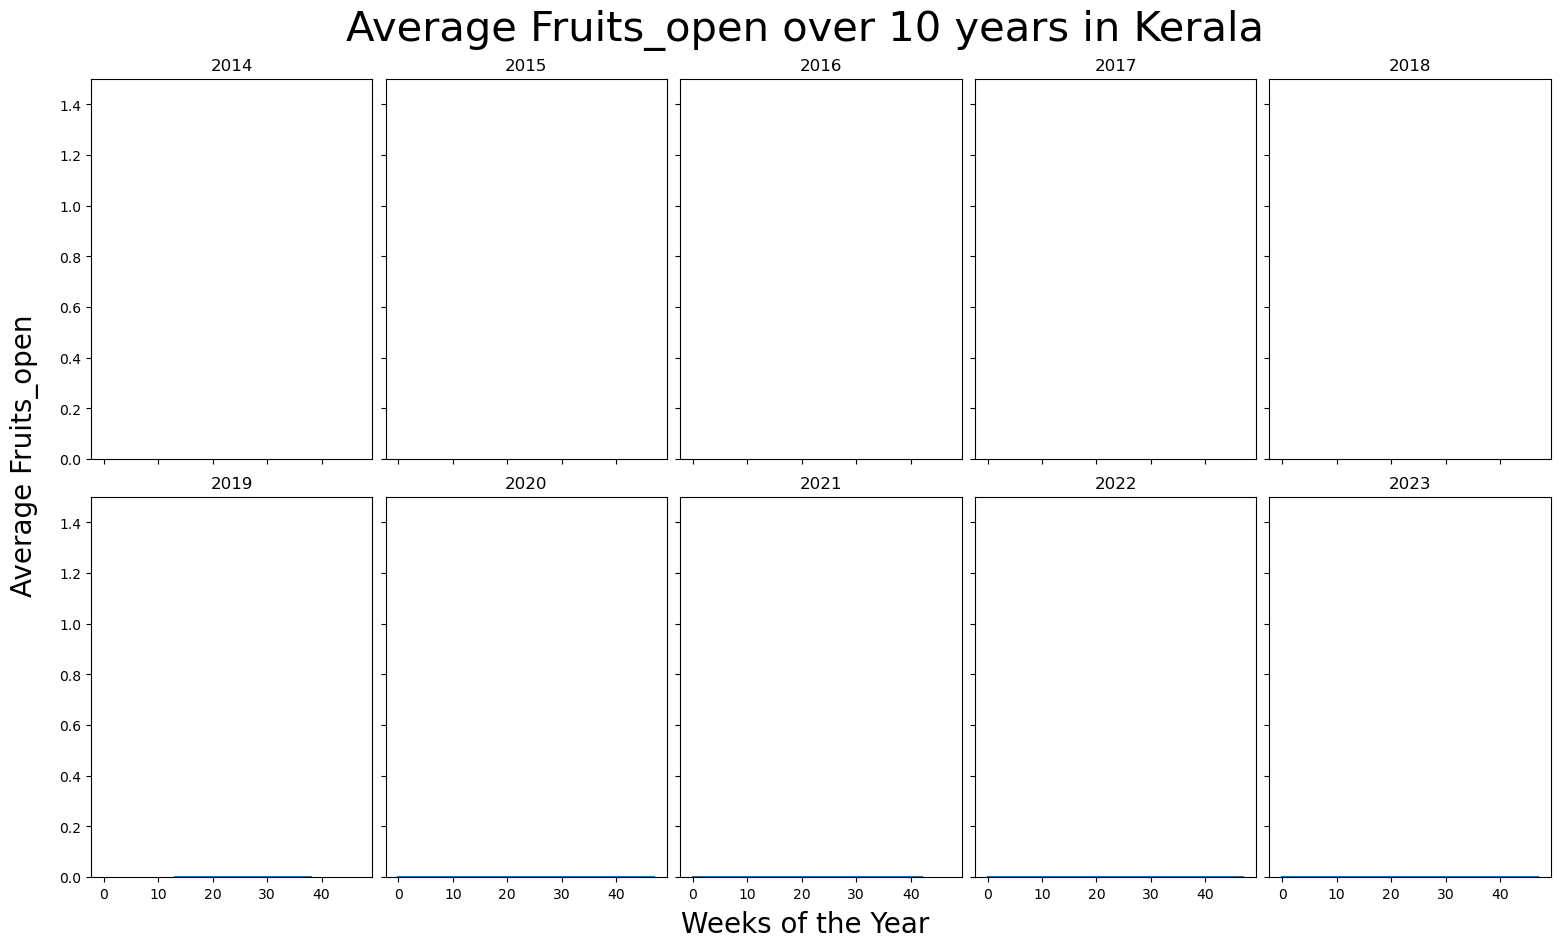

In [212]:
jack_df = kerala_df[kerala_df['Species_name'] == 'Jackfruit- Artocarpus heterophyllus']
for feature in jack_df.columns[2:-2]:
    fig, ax = plt.subplots(2, 5, sharex=True, sharey=True, constrained_layout=True, figsize=(15, 9))
    for idx, year in enumerate(kerala_df['Year'].sort_values().unique()):
        plt.subplot(2, 5, idx+1)
        plt.ylim(0,1.5)
        try:
            year_df = jack_df[jack_df['Year'] == year]
        except:
            continue
        year_df = year_df[year_df[feature].isin([0,1,2])] # Getting rid of NA values
        year_df = year_df.sort_values('Week')
        plt.plot(np.sort(year_df['Week'].unique()), year_df.groupby(['Week'])[feature].mean())
        plt.title(year)
    fig.suptitle(f"Average {feature} over 10 years in Kerala", fontsize=30)
    #plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
    fig.text(0.5, -0.03, 'Weeks of the Year', ha='center', fontsize=20)
    fig.text(-0.03, 0.5, f'Average {feature}', va='center', rotation='vertical', fontsize=20)
    plt.show()

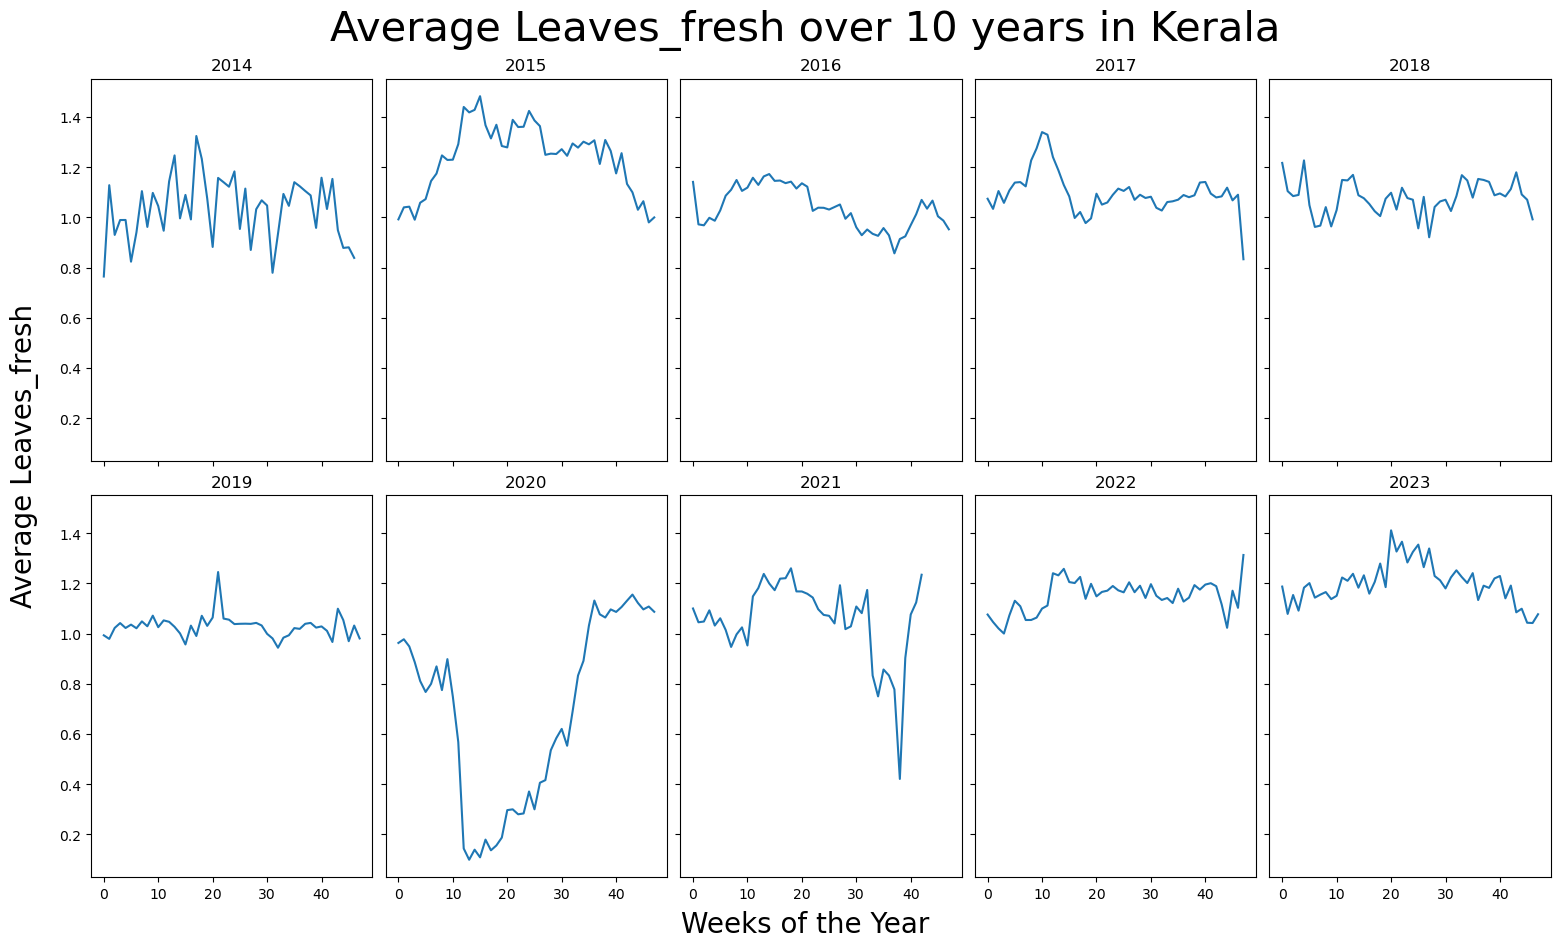

In [184]:
fig, ax = plt.subplots(2, 5, sharex=True, sharey=True, constrained_layout=True, figsize=(15, 9))
for idx, year in enumerate(kerala_df['Year'].sort_values().unique()):
    plt.subplot(2, 5, idx+1)
    year_df = kerala_df[kerala_df['Year'] == year]
    year_df = year_df[year_df['Leaves_fresh'].isin([0,1,2])] # Getting rid of NA values
    year_df = year_df.sort_values('Week')
    plt.plot(np.sort(year_df['Week'].unique()), year_df.groupby(['Week'])['Leaves_fresh'].mean())
    plt.title(year)
fig.suptitle(f"Average Leaves_fresh over 10 years in Kerala", fontsize=30)
#plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
fig.text(0.5, -0.03, 'Weeks of the Year', ha='center', fontsize=20)
fig.text(-0.03, 0.5, 'Average Leaves_fresh', va='center', rotation='vertical', fontsize=20)
plt.show()


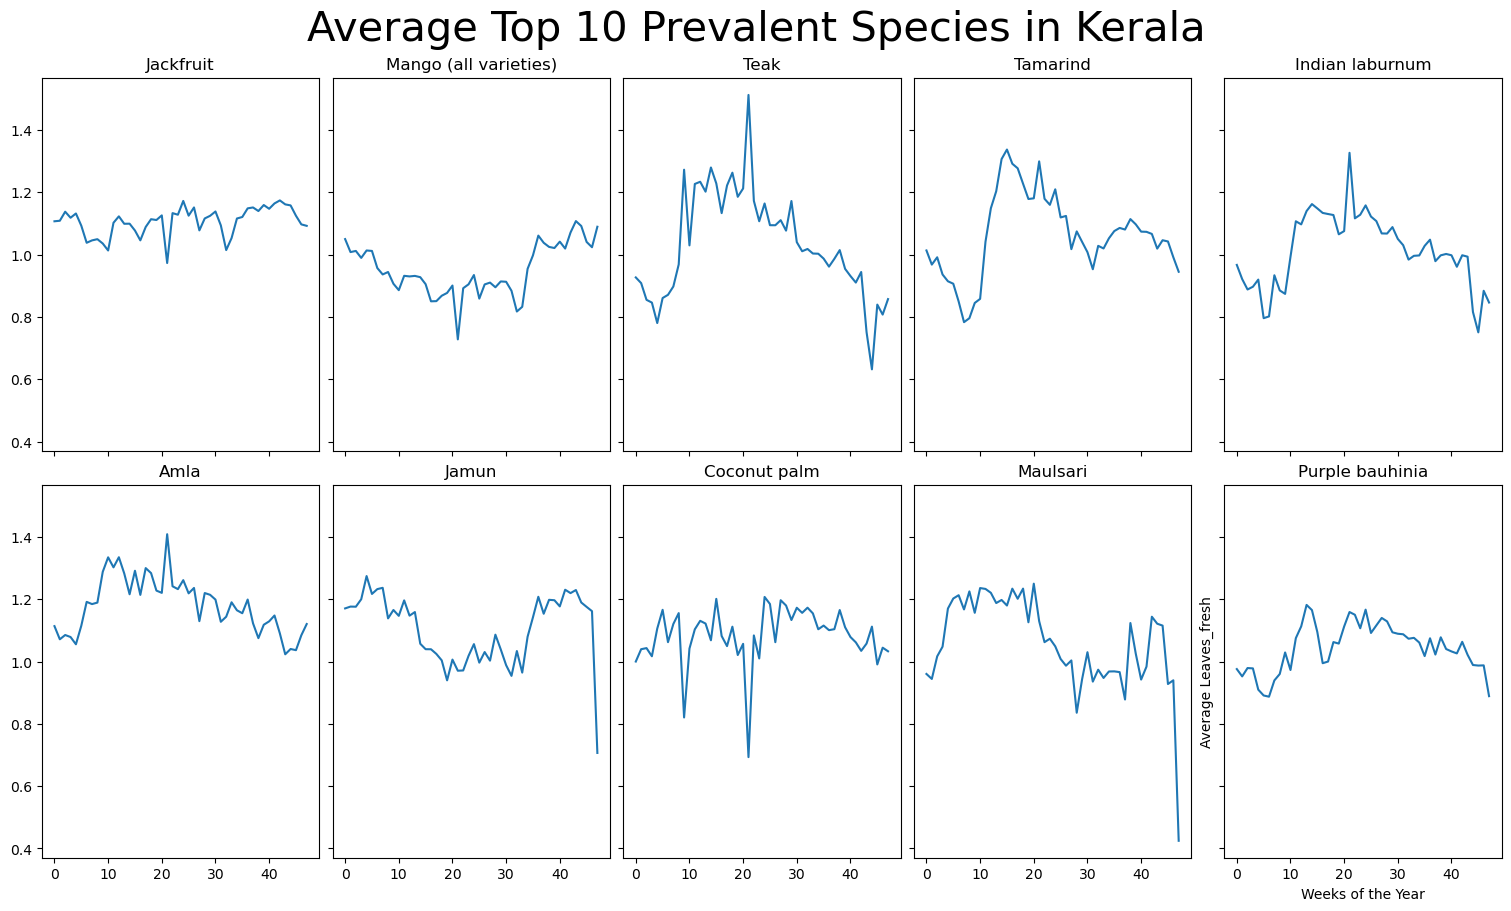

In [146]:
fig, ax = plt.subplots(2, 5, sharex=True, sharey=True, constrained_layout=True, figsize=(15, 9))
for idx, species in enumerate(kerala_df['Species_name'].value_counts().index[:10]):
    plt.subplot(2, 5, idx+1)
    species_df = kerala_df[kerala_df['Species_name'] == species]
    species_df = species_df.sort_values('Week')
    plt.plot(np.sort(species_df['Week'].unique()), species_df.groupby(['Week'])['Leaves_fresh'].mean())
    plt.title(re.sub('-.+','',species))
fig.suptitle(f"Average Leaves_fresh for Top 10 Prevalent Species in Kerala", fontsize=30)
#plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
fig.text(0.5, 0.04, 'Weeks of the Year', ha='center')
fig.text(0.04, 0.5, 'Average Leaves_fresh', va='center', rotation='vertical')
plt.xlabel('Weeks of the Year')
plt.ylabel('Average Leaves_fresh')
plt.show()


In [ ]:
ref_kerala_df = pd.read_csv("citizen_data/kerala_citizenData.csv")
ref_kerala_df = pd.read_csv("reference_data/kerala_citizenData.csv")


<AxesSubplot:xlabel='Leaves_fresh'>

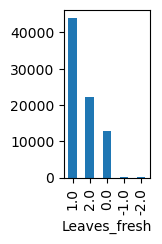

In [10]:
# Test
plt.subplot(2, 5, 1)
kerala_df[kerala_df['Species_name'] == 'Jackfruit- Artocarpus heterophyllus']['Leaves_fresh'].value_counts().plot.bar()
plt.subplot(2, 5, 1)
kerala_df[kerala_df['Species_name'] == 'Tamarind- Tamarindus indica']['Leaves_fresh'].value_counts().plot.bar()

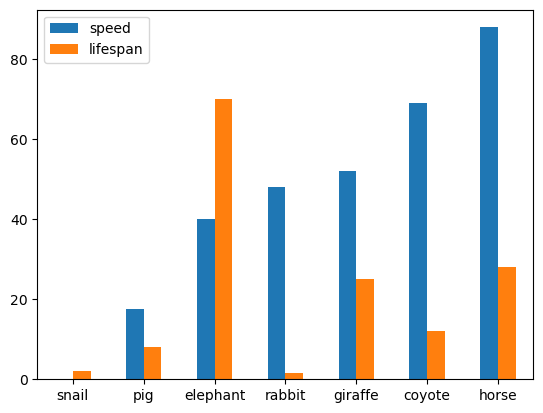

In [45]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)
ax = df.plot.bar(rot=0)

<AxesSubplot:>

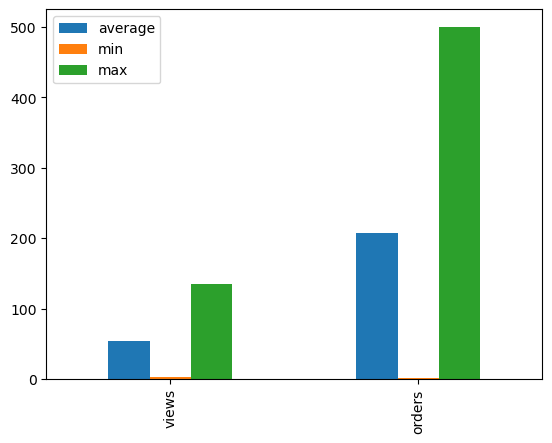

In [179]:
import pandas as pd

groups = [[23,135,3], [123,500,1]]
group_labels = ['views', 'orders']

# Convert data to pandas DataFrame.
df = pd.DataFrame(groups, index=group_labels).T

# Plot.
pd.concat(
    [
        df.mean().rename('average'), 
        df.min().rename('min'), 
        df.max().rename('max')
    ],
    axis=1,
).plot.bar()

In [198]:
print("    Leaves_fresh Values Reported")
for year in kerala_df['Year'].sort_values().unique():
    year_df = kerala_df[kerala_df['Year'] == year]
    print(f"{year} : {year_df['Leaves_fresh'].sort_values().unique()}")

    Leaves_fresh Values Reported
2014 : [-1.  0.  1.  2.]
2015 : [-1.  0.  1.  2.]
2016 : [-1.  0.  1.  2. nan]
2017 : [-1.  0.  1.  2. nan]
2018 : [-2. -1.  0.  1.  2.]
2019 : [-2. -1.  0.  1.  2.]
2020 : [-2. -1.  0.  1.  2.]
2021 : [-2. -1.  0.  1.  2.]
2022 : [-2. -1.  0.  1.  2.]
2023 : [-2. -1.  0.  1.  2.]


In [200]:
print("    Leaves_fresh Values Reported")
species_df = kerala_df[kerala_df['Species_name'] == 'Jackfruit- Artocarpus heterophyllus']
for year in species_df['Year'].sort_values().unique():
    year_df = species_df[species_df['Year'] == year]
    print(f"{year} : {year_df['Leaves_fresh'].sort_values().unique()}")

    Leaves_fresh Values Reported
2014 : [-1.  0.  1.  2.]
2015 : [-1.  0.  1.  2.]
2016 : [-1.  0.  1.  2.]
2017 : [-1.  0.  1.  2. nan]
2018 : [-2. -1.  0.  1.  2.]
2019 : [-2. -1.  0.  1.  2.]
2020 : [-1.  0.  1.  2.]
2021 : [-2. -1.  0.  1.  2.]
2022 : [-2. -1.  0.  1.  2.]
2023 : [-2. -1.  0.  1.  2.]
